<a href="https://colab.research.google.com/github/ilmuneraka/xg-xgot-statsbomb-worldcup2022/blob/main/Building_xG%2C_xGOT_Using_World_Cup_2022_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building Your Own Expected Goals

## Installing Requirements

In [ ]:
!pip install -U mplsoccer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.1/68.1 kB 3.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer import Pitch, VerticalPitch, FontManager
from mplsoccer import Sbopen

pd.set_option('display.max_columns', 500)

## Collecting World Cup 2022 Data

In [ ]:
parser = Sbopen()
df_match = parser.match(competition_id=43, season_id=106)
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 52 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   match_id                         64 non-null     int64         
 1   match_date                       64 non-null     datetime64[ns]
 2   kick_off                         64 non-null     datetime64[ns]
 3   home_score                       64 non-null     int64         
 4   away_score                       64 non-null     int64         
 5   match_status                     64 non-null     object        
 6   match_status_360                 64 non-null     object        
 7   last_updated                     64 non-null     datetime64[ns]
 8   last_updated_360                 64 non-null     datetime64[ns]
 9   match_week                       64 non-null     int64         
 10  competition_id                   64 non-null     int64         


In [ ]:
df_match.head()

,match_id,match_date,kick_off,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition_id,country_name,competition_name,season_id,season_name,home_team_id,home_team_name,home_team_gender,home_team_group,home_team_country_id,home_team_country_name,home_team_managers_id,home_team_managers_name,home_team_managers_nickname,home_team_managers_dob,home_team_managers_country_id,home_team_managers_country_name,away_team_id,away_team_name,away_team_gender,away_team_group,away_team_country_id,away_team_country_name,away_team_managers_id,away_team_managers_name,away_team_managers_nickname,away_team_managers_dob,away_team_managers_country_id,away_team_managers_country_name,metadata_data_version,metadata_shot_fidelity_version,metadata_xy_fidelity_version,competition_stage_id,competition_stage_name,stadium_id,stadium_name,stadium_country_id,stadium_country_name,referee_id,referee_name,referee_country_id,referee_country_name
0,3857256,2022-12-02,2022-12-02 21:00:00,2,3,available,available,2023-02-17 23:45:15.306706,2023-04-26 23:49:58.956186,3,43,International,FIFA World Cup,106,2022,786,Serbia,male,G,203,Serbia,5908,Dragan Stojković,Dragan Stojković,1965-03-03,203,Serbia,773,Switzerland,male,G,221,Switzerland,2832,Murat Yakin,Murat Yakin,1974-09-15,221,Switzerland,1.1.0,2,2,10,Group Stage,1001115,Stadium 974,185,Qatar,1121.0,Fernando Andrés Rapallini,11.0,Argentina
1,3869151,2022-12-03,2022-12-03 21:00:00,2,1,available,available,2023-04-16 05:09:50.559670,2023-05-14 23:35:15.370647,4,43,International,FIFA World Cup,106,2022,779,Argentina,male,None,11,Argentina,5677,Lionel Sebastián Scaloni,Lionel Sebastián Scaloni,1978-05-16,11,Argentina,792,Australia,male,None,14,Australia,5696,Graham James Arnold,Graham James Arnold,1963-08-03,14,Australia,1.1.0,2,2,33,Round of 16,1000793,Ahmad bin Ali Stadium,185,Qatar,367.0,Szymon Marciniak,182.0,Poland
2,3857257,2022-11-30,2022-11-30 17:00:00,1,0,available,available,2023-04-28 17:13:10.958725,2023-04-28 17:16:11.332325,3,43,International,FIFA World Cup,106,2022,792,Australia,male,D,14,Australia,5696,Graham James Arnold,Graham James Arnold,1963-08-03,14,Australia,776,Denmark,male,D,61,Denmark,255,Kasper Hjulmand,Kasper Hjulmand,1972-04-09,61,Denmark,1.1.0,2,2,10,Group Stage,117897,Al Janoub Stadium,185,Qatar,2311.0,Mustapha Ghorbal,4.0,Algeria
3,3857258,2022-11-24,2022-11-24 21:00:00,2,0,available,available,2023-04-01 16:33:02.950911,2023-05-30 15:21:09.388797,1,43,International,FIFA World Cup,106,2022,781,Brazil,male,G,31,Brazil,4704,Telê Santana da Silva,Telê Santana,1931-07-26,31,Brazil,786,Serbia,male,G,203,Serbia,5908,Dragan Stojković,Dragan Stojković,1965-03-03,203,Serbia,1.1.0,2,2,10,Group Stage,1001114,Lusail Stadium,185,Qatar,741.0,Alireza Faghani,107.0,"Iran, Islamic Republic of"
4,3857288,2022-11-26,2022-11-26 12:00:00,0,1,available,available,2023-02-28 21:25:20.888552,2023-04-27 00:30:07.835815,2,43,International,FIFA World Cup,106,2022,777,Tunisia,male,D,232,Tunisia,1001303,Jalel Kadri,Jalel Kadri,NaT,232,Tunisia,792,Australia,male,D,14,Australia,5696,Graham James Arnold,Graham James Arnold,1963-08-03,14,Australia,1.1.0,2,2,10,Group Stage,117897,Al Janoub Stadium,185,Qatar,225.0,Daniel Siebert,85.0,Germany


## Collecting Shots

In [ ]:
# iterate through all matches to get the events data
df_matches = {}
for i, id in enumerate(df_match['match_id']):
  df_matches[id] = {}
  df_matches[id]['event'], df_matches[id]['related'], df_matches[id]['freeze'], df_matches[id]['tactic'] = parser.event(id)

In [ ]:
# example events data, filtered to shots only
df_matches[3857288]['event'][df_matches[3857288]['event']['type_name'] == 'Shot'].head()

,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,end_x,end_y,body_part_id,body_part_name,sub_type_id,sub_type_name,x,y,under_pressure,outcome_id,outcome_name,counterpress,aerial_won,ball_recovery_recovery_failure,pass_switch,out,dribble_nutmeg,pass_cross,shot_statsbomb_xg,shot_first_time,technique_id,technique_name,goalkeeper_position_id,goalkeeper_position_name,off_camera,pass_cut_back,injury_stoppage_in_chain,pass_deflected,block_deflection,pass_assisted_shot_id,pass_shot_assist,end_z,shot_key_pass_id,foul_committed_offensive,foul_committed_card_id,foul_committed_card_name,foul_won_defensive,foul_committed_advantage,foul_won_advantage,substitution_replacement_id,substitution_replacement_name,dribble_overrun
225,f7f89232-029c-46d3-9b33-6171761da364,226,1,00:05:35.148000,5,35,15,0.037121,3857288,16,Shot,792,Australia,3,From Free Kick,792,Australia,NaN,28370.0,Fran Karačić,2.0,Right Back,NaN,NaN,NaN,NaN,NaN,NaN,91.8,41.1,40.0,Right Foot,87.0,Open Play,90.9,41.2,1.0,96.0,Blocked,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.015131,True,95.0,Volley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
815,079ee5e7-8f88-419b-874f-08f5f6d45c07,816,1,00:20:20.141000,20,20,43,1.158633,3857288,16,Shot,777,Tunisia,4,From Throw In,777,Tunisia,NaN,9236.0,Mohamed Dräger,7.0,Right Wing Back,NaN,NaN,NaN,NaN,NaN,NaN,120.0,40.4,40.0,Right Foot,87.0,Open Play,92.0,42.5,NaN,98.0,Off T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.029704,NaN,93.0,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.9,7b76477e-90f5-4ef8-a2e9-538a3500400b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
855,3af59ce2-13dd-4ef4-b999-35444cb60d7c,856,1,00:22:50.680000,22,50,47,1.104271,3857288,16,Shot,792,Australia,4,From Throw In,792,Australia,NaN,33492.0,Mitchell Thomas Duke,22.0,Right Center Forward,NaN,NaN,NaN,NaN,NaN,NaN,120.0,43.6,37.0,Head,87.0,Open Play,110.1,32.5,NaN,97.0,Goal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.044595,NaN,93.0,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
878,787614d6-21dd-40c6-9fd7-be27b59bdc71,879,1,00:26:06.836000,26,6,50,0.095529,3857288,16,Shot,792,Australia,3,From Free Kick,792,Australia,NaN,33492.0,Mitchell Thomas Duke,22.0,Right Center Forward,NaN,NaN,NaN,NaN,NaN,NaN,111.4,34.8,37.0,Head,87.0,Open Play,110.7,34.3,NaN,96.0,Blocked,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.039484,NaN,93.0,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,959fe1f8-14c4-4f1f-be78-7642c520ee21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1072,0053d038-426b-4756-b8e3-67355127786c,1073,1,00:33:45.687000,33,45,64,0.629841,3857288,16,Shot,792,Australia,2,From Corner,792,Australia,NaN,5490.0,Jackson Irvine,9.0,Right Defensive Midfield,NaN,NaN,NaN,NaN,NaN,NaN,120.0,47.2,40.0,Right Foot,87.0,Open Play,114.3,48.2,NaN,98.0,Off T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.075431,True,89.0,Backheel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3,e1ac1a22-6c63-4700-a85c-3b8328d9de74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_matches[3857288]['event'].shape

(3360, 70)

In [ ]:
# types of shot play
df_matches[3869321]['event'][df_matches[3869321]['event']['type_name'] == 'Shot']['sub_type_name'].unique()

array(['Open Play', 'Free Kick', 'Penalty'], dtype=object)

## What Features are We Going to Use?
For our first model, we'll use a very simple approach to build expected goals model. We'll calculate probability of a goal by:
- ANGLE, wider the angle the more likely it will be a goal
- DISTANCE to goal, closer the distance the more likely it will be a goal

## Preparing Data

In [ ]:
# we'll take the location, outcome, and also the xG by Statsbomb to compare it to our model later
df_shot = pd.DataFrame(columns=['x', 'y', 'outcome_name', 'shot_statsbomb_xg'])

for id in df_match['match_id']:
  # we take the period <= 4 because statsbomb also record penalty shots in the penalty shoot-out stage, we won't be using those shots
  # for our first model, we'll only take open play shots because penalty shots tend to have way higher goal probability
  # we'll use the other shots scenario in our next model
  mask_shot = (df_matches[id]['event'].type_name == 'Shot') & (df_matches[id]['event'].period	<= 4) & (df_matches[id]['event'].sub_type_name	== 'Open Play')
  shots_temp = df_matches[id]['event'].loc[mask_shot, ['x', 'y', 'outcome_name', 'shot_statsbomb_xg']]
  df_shot = pd.concat([df_shot, shots_temp]).reset_index(drop=True)

In [ ]:
df_shot.head()

,x,y,outcome_name,shot_statsbomb_xg
0,96.0,38.8,Blocked,0.036566
1,113.1,40.7,Saved,0.353289
2,103.8,41.9,Saved,0.069527
3,112.2,36.8,Off T,0.081609
4,97.8,51.5,Post,0.030002


In [ ]:
len(df_shot)

1382

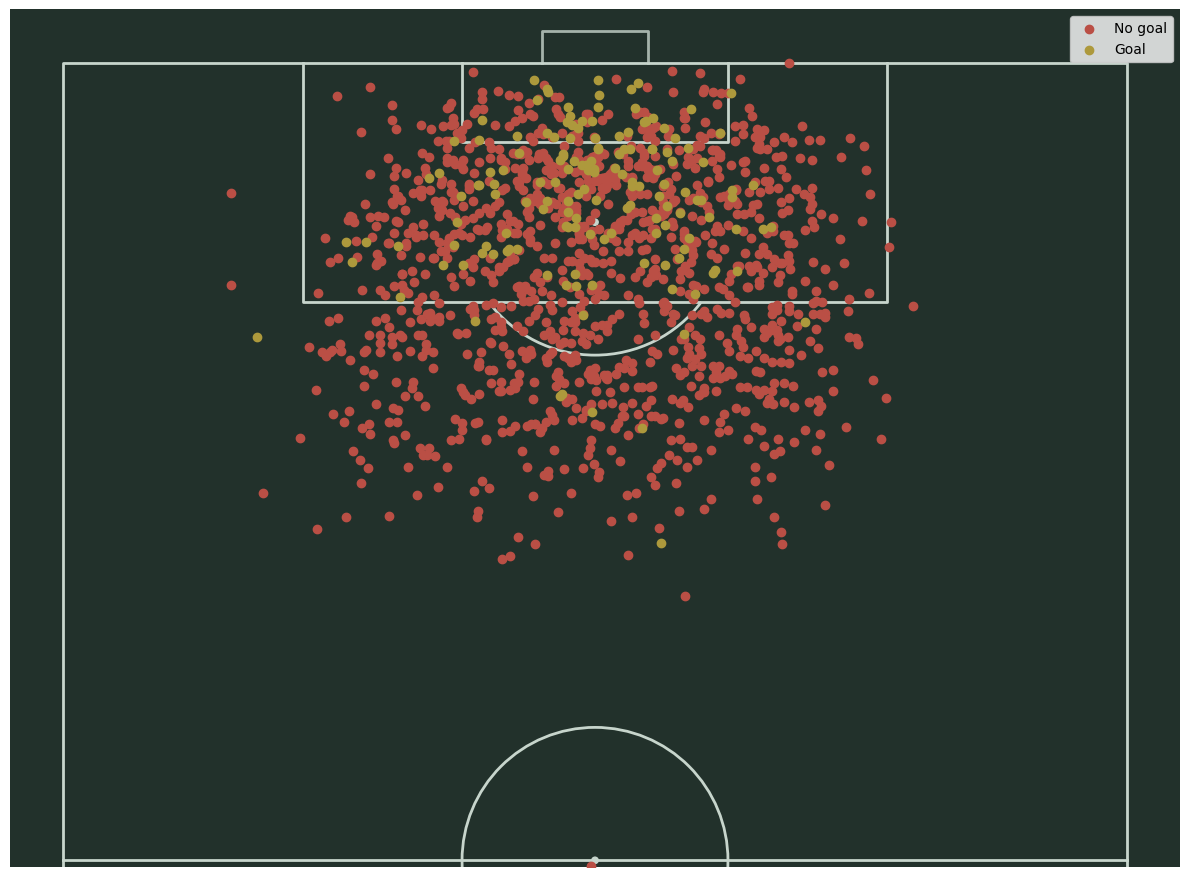

In [ ]:
# visualizing shots

# filter goals / non-shot goals
df_goals = df_shot[df_shot.outcome_name == 'Goal'].copy()
df_non_goal_shots = df_shot[df_shot.outcome_name != 'Goal'].copy()

# setup the pitch
pitch = VerticalPitch(pad_bottom=0.5,  # pitch extends slightly below halfway line
                      half=True,  # half of a pitch
                      goal_type='box',
                      goal_alpha=0.8, pitch_color='#22312b', line_color='#c7d5cc')  # control the goal transparency

fig, ax = pitch.draw(figsize=(12, 10))

sc1 = pitch.scatter(df_non_goal_shots.x, df_non_goal_shots.y,
                    c='#ba4f45',
                    marker='o',
                    ax=ax, label="No goal")

sc2 = pitch.scatter(df_goals.x, df_goals.y,
                    c='#ad993c',
                    marker='o',
                    ax=ax, label="Goal")

plt.legend(loc='best')
plt.show()

In [ ]:
import math

def calculate_angle(x, y):
  # 44 and 36 is the location of each goal post
  g0 = [120, 44]
  p = [x, y]
  g1 = [120, 36]

  v0 = np.array(g0) - np.array(p)
  v1 = np.array(g1) - np.array(p)

  angle = np.math.atan2(np.linalg.det([v0,v1]),np.dot(v0,v1))
  return(abs(np.degrees(angle)))

def calculate_distance(x, y):
  x_dist = 120-x
  y_dist = 0
  if (y<36):
    y_dist = 36-y
  elif (y>44):
    y_dist = y-44
  return math.sqrt(x_dist**2 + y_dist**2)

In [ ]:
df_shot['angle'] = df_shot.apply(lambda row:calculate_angle(row['x'], row['y']), axis=1)
df_shot['distance'] = df_shot.apply(lambda row:calculate_distance(row['x'], row['y']), axis=1)

In [ ]:
# we'll create new column to define goal or not
df_shot['goal'] = df_shot.apply(lambda row:1 if row['outcome_name']=='Goal' else 0, axis=1)

In [ ]:
df_shot.head()

,x,y,outcome_name,shot_statsbomb_xg,angle,distance,goal
0,96.0,38.8,Blocked,0.036566,18.879548,24.00000,0
1,113.1,40.7,Saved,0.353289,59.821068,6.90000,0
2,103.8,41.9,Saved,0.069527,27.397542,16.20000,0
3,112.2,36.8,Off T,0.081609,48.565404,7.80000,0
4,97.8,51.5,Post,0.030002,16.255762,23.43267,0


In [ ]:
df_shot.groupby('goal').mean()

<ipython-input-17-da1ca12ff282>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_shot.groupby('goal').mean()


,x,y,shot_statsbomb_xg,angle,distance
goal,,,,,
0,104.094156,39.973539,0.078670,24.603812,17.339943
1,109.753333,39.596000,0.259755,40.928138,10.902455


- we can see that shots that ended up as goals have wider angles and shorter distances

In [ ]:
import altair as alt
  
fig = alt.Chart(df_shot).mark_point().encode(
  x='angle',y='goal')
  
fig + fig.transform_regression('angle','goal').mark_line()

alt.LayerChart(...)

In [ ]:
fig = alt.Chart(df_shot).mark_point().encode(
  x='distance',y='goal')
  
fig + fig.transform_regression('distance','goal').mark_line()

alt.LayerChart(...)

In [ ]:
df_shot['distance'].corr(df_shot['goal'])

-0.24592283299754172

In [ ]:
df_shot['angle'].corr(df_shot['goal'])

0.3116086948720843

## Modeling
From the charts above, you can see the regression line between goal and the features, and it's confirmed that the wider the angle the more likely a shot become a goal, the closer the distance the more likely it become a goal

Now let's build our model using Linear Regression and also Logistic Regression, I'll explain why we can't use the Linear Regression model later

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

model_names = ['Linear', 'Logistic']
models = {}
models['Linear'] = {}
models['Linear']['model'] = LinearRegression()
models['Logistic'] = {}
models['Logistic']['model'] = LogisticRegression()

In [ ]:
X = df_shot[['angle', 'distance']]
y = df_shot['goal']

In [ ]:
from sklearn import metrics
for mod in model_names:
  models[mod]['model'].fit(X, y)
  if mod == 'Logistic':
    models[mod]['y_pred'] = models[mod]['model'].predict_proba(X)[:, 1]
  else:
    models[mod]['y_pred'] = models[mod]['model'].predict(X)
  
  models[mod]['r2_score'] = metrics.r2_score(y, models[mod]['y_pred'])
  print("R2 of model {}: {}".format(mod, models[mod]['r2_score']))

R2 of model Linear: 0.09901547697233781
R2 of model Logistic: 0.09565489627052592


In [ ]:
# let's see the R2 Score of the Statsbomb xG model
metrics.r2_score(y, df_shot['shot_statsbomb_xg'])

0.19979665652614864

- Obviously our model doesn't perform any better than the advanced Statsbomb xG model since we only use 2 features and relatively small number of samples

### Why use .predict_proba(X)[:, 1]
- As you may know, Logistic Regression is a classification model, so the .predict() function will return the predicted class (0 or 1) instead of the probability while in our case we need the probability
- Why the [:, 1] (slicing)? .predict_proba() will return two dimensional array which contains probability of each class, we only need the second column because it's probability of class 1 or the probability of a goal

In [ ]:
models[mod]['model'].predict(X)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
models[mod]['model'].predict_proba(X)

array([[0.95993315, 0.04006685],
       [0.70472823, 0.29527177],
       [0.91485483, 0.08514517],
       ...,
       [0.68147038, 0.31852962],
       [0.96699581, 0.03300419],
       [0.87333062, 0.12666938]])

In [ ]:
df_shot['xG_Linear'] = models['Linear']['y_pred']
df_shot['xG_Logistic'] = models['Logistic']['y_pred']

In [ ]:
df_shot.head()

,x,y,outcome_name,shot_statsbomb_xg,angle,distance,goal,xG_Linear,xG_Logistic
0,96.0,38.8,Blocked,0.036566,18.879548,24.00000,0,0.052939,0.040067
1,113.1,40.7,Saved,0.353289,59.821068,6.90000,0,0.303467,0.295272
2,103.8,41.9,Saved,0.069527,27.397542,16.20000,0,0.114825,0.085145
3,112.2,36.8,Off T,0.081609,48.565404,7.80000,0,0.243340,0.228742
4,97.8,51.5,Post,0.030002,16.255762,23.43267,0,0.040711,0.039246


### Linear Regression Model

In [ ]:
df_shot.loc[df_shot['xG_Linear'] < 0]

,x,y,outcome_name,shot_statsbomb_xg,angle,distance,goal,xG_Linear,xG_Logistic
68,84.3,34.2,Saved,0.007537,12.463718,35.745349,0,-0.007185,0.014401
85,86.3,31.2,Blocked,0.010592,12.691578,34.040123,0,-0.002085,0.016449
102,87.2,52.2,Wayward,0.005271,12.248635,33.809466,0,-0.003839,0.016556
157,89.7,57.6,Off T,0.007071,11.311296,33.212197,0,-0.007299,0.016923
174,96.1,60.9,Off T,0.008207,10.909303,29.271488,0,-0.000303,0.022471
232,85.5,41.2,Saved,0.018110,13.211289,34.500000,0,-0.000463,0.016095
282,118.2,23.1,Saved,0.010853,3.021054,13.024976,0,-0.003602,0.061015
289,83.0,42.5,Off T,0.006952,12.285335,37.000000,0,-0.010992,0.013053
366,101.7,63.9,Wayward,0.007870,9.340150,27.035162,0,-0.003250,0.025540
403,87.5,26.6,Off T,0.006506,12.032415,33.832085,0,-0.005006,0.016442


In [ ]:
import altair as alt
  
fig = alt.Chart(df_shot).mark_point().encode(
  x='angle',y='xG_Linear')
fig

alt.Chart(...)

In [ ]:
import altair as alt
  
fig = alt.Chart(df_shot).mark_point().encode(
  x='distance',y='xG_Linear')
fig

alt.Chart(...)

### Why we can't use Linear Regression model
- Linear Regression model works on a line, which means on certain point it will reach negative values
- And you can see there are some negative xG predicted, which doesn't make any sense since there is no such thing as negative probability
- Probability of something happening is between 0 and 1, so we can't use this Linear Regression model

### Logistic Regression Model

In [ ]:
df_shot.loc[df_shot['xG_Logistic'] < 0]

,x,y,outcome_name,shot_statsbomb_xg,angle,distance,goal,xG_Linear,xG_Logistic


- There's no negative xG predicted

In [ ]:
import altair as alt
  
fig = alt.Chart(df_shot).mark_point().encode(
  x='angle',y='xG_Logistic')
fig

alt.Chart(...)

In [ ]:
import altair as alt
  
fig = alt.Chart(df_shot).mark_point().encode(
  x='distance',y='xG_Logistic')
fig

alt.Chart(...)

## Evaluate it on a match
The common use case for xG model is to sum xG of all shots from a match and then compare it to the actual score. In this case, we'll also compare it to the xG of Statsbomb.

We'll try to evaluate it on Semi Final match between Argentina vs Croatia

In [ ]:
df_match[df_match['competition_stage_name'] == 'Semi-finals']

,match_id,match_date,kick_off,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition_id,country_name,competition_name,season_id,season_name,home_team_id,home_team_name,home_team_gender,home_team_group,home_team_country_id,home_team_country_name,home_team_managers_id,home_team_managers_name,home_team_managers_nickname,home_team_managers_dob,home_team_managers_country_id,home_team_managers_country_name,away_team_id,away_team_name,away_team_gender,away_team_group,away_team_country_id,away_team_country_name,away_team_managers_id,away_team_managers_name,away_team_managers_nickname,away_team_managers_dob,away_team_managers_country_id,away_team_managers_country_name,metadata_data_version,metadata_shot_fidelity_version,metadata_xy_fidelity_version,competition_stage_id,competition_stage_name,stadium_id,stadium_name,stadium_country_id,stadium_country_name,referee_id,referee_name,referee_country_id,referee_country_name
19,3869519,2022-12-13,2022-12-13 21:00:00,3,0,available,available,2023-04-19 06:53:52.197711,2023-04-26 22:32:37.808359,6,43,International,FIFA World Cup,106,2022,779,Argentina,male,None,11,Argentina,5677,Lionel Sebastián Scaloni,Lionel Sebastián Scaloni,1978-05-16,11,Argentina,785,Croatia,male,None,56,Croatia,307,Zlatko Dalić,Zlatko Dalić,1966-10-26,56,Croatia,1.1.0,2,2,15,Semi-finals,1001114,Lusail Stadium,185,Qatar,269.0,Daniele Orsato,112.0,Italy
21,3869552,2022-12-14,2022-12-14 21:00:00,2,0,available,available,2023-03-18 06:06:29.317928,2023-04-26 22:30:45.010084,6,43,International,FIFA World Cup,106,2022,771,France,male,None,78,France,545,Didier Deschamps,Didier Deschamps,1968-10-15,78,France,788,Morocco,male,None,154,Morocco,1001086,Hoalid Regragui,Hoalid Regragui,1975-09-23,154,Morocco,1.1.0,2,2,15,Semi-finals,1001113,Al Bayt Stadium,185,Qatar,740.0,César Arturo Ramos Palazuelos,147.0,Mexico


In [ ]:
df_matches[3869519]['event'][df_matches[3869519]['event']['type_name'] == 'Shot'].head()

,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,end_x,end_y,body_part_id,body_part_name,sub_type_id,sub_type_name,x,y,outcome_id,outcome_name,counterpress,under_pressure,pass_switch,off_camera,pass_cross,aerial_won,technique_id,technique_name,out,foul_committed_advantage,foul_won_advantage,dribble_nutmeg,foul_won_defensive,pass_assisted_shot_id,pass_shot_assist,shot_statsbomb_xg,end_z,shot_key_pass_id,goalkeeper_position_id,goalkeeper_position_name,ball_recovery_recovery_failure,foul_committed_card_id,foul_committed_card_name,foul_committed_penalty,foul_won_penalty,bad_behaviour_card_id,bad_behaviour_card_name,pass_deflected,shot_one_on_one,shot_first_time,dribble_overrun,ball_recovery_offensive,substitution_replacement_id,substitution_replacement_name,pass_no_touch,injury_stoppage_in_chain,pass_cut_back,pass_miscommunication,pass_goal_assist
774,50d88cc2-208f-4272-9156-ea9f0049c8bc,775,1,00:15:52.400000,15,52,29,0.935009,3869519,16,Shot,785,Croatia,2,From Corner,785,Croatia,NaN,3471.0,Dejan Lovren,3.0,Right Center Back,NaN,NaN,NaN,NaN,NaN,NaN,120.0,33.5,37.0,Head,87.0,Open Play,115.0,27.7,98.0,Off T,NaN,1.0,NaN,NaN,NaN,True,93.0,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.014029,4.2,9feebfd9-e719-4584-a026-bf09811e032c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1166,e0e3e4da-8a23-4e2c-b4d2-b7bef8feb9fe,1167,1,00:24:35.118000,24,35,45,1.145676,3869519,16,Shot,779,Argentina,4,From Throw In,779,Argentina,NaN,38718.0,Enzo Fernandez,11.0,Left Defensive Midfield,NaN,NaN,NaN,NaN,NaN,NaN,118.5,42.9,40.0,Right Foot,87.0,Open Play,93.1,36.9,100.0,Saved,NaN,NaN,NaN,NaN,NaN,NaN,93.0,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.027809,0.8,50d85c7c-8a99-477d-b86c-283d59f947ca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1424,7c8c6f80-da85-4be8-a5cf-34f58c51a82e,1425,1,00:30:33.660000,30,33,52,1.630258,3869519,16,Shot,785,Croatia,4,From Throw In,785,Croatia,NaN,5474.0,Ivan Perišić,21.0,Left Wing,NaN,NaN,NaN,NaN,NaN,NaN,120.0,38.9,40.0,Right Foot,87.0,Open Play,106.9,23.2,98.0,Off T,NaN,NaN,NaN,NaN,NaN,NaN,92.0,Lob,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.034139,4.2,b373047b-68cd-462c-844b-90e0be24c52b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1442,09340406-31db-4236-8bf0-11900a1f269b,1443,1,00:33:27.067000,33,27,54,0.450391,3869519,16,Shot,779,Argentina,5,Other,779,Argentina,NaN,5503.0,Lionel Andrés Messi Cuccittini,22.0,Right Center Forward,NaN,NaN,NaN,NaN,NaN,NaN,120.0,42.3,38.0,Left Foot,88.0,Penalty,108.0,40.0,97.0,Goal,NaN,NaN,NaN,NaN,NaN,NaN,93.0,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.783500,2.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1620,dcc38d2c-1610-4362-bb0c-2fd6aa28c5bf,1621,1,00:38:26.300000,38,26,61,0.326927,3869519,16,Shot,779,Argentina,6,From Counter,779,Argentina,NaN,29560.0,Julián Álvarez,24.0,Left Center Forward,NaN,NaN,NaN,NaN,NaN,NaN,120.0,36.8,40.0,Right Foot,87.0,Open Play,112.7,37.4,97.0,Goal,NaN,NaN,NaN,NaN,NaN,NaN,95.0,Volley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.361724,0.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# define function to calculate xG
def calculate_xg(x, y):
  angle = calculate_angle(x, y)
  distance = calculate_distance(x, y)
  X = [[angle, distance]]
  xg = models[mod]['model'].predict_proba(X)[:, 1][0]
  return xg

In [ ]:
df_evaluate = df_matches[3869519]['event'][df_matches[3869519]['event']['type_name'] == 'Shot'].copy()

In [ ]:
# take only open play
evaluate_mask = (df_evaluate.type_name == 'Shot') & (df_evaluate.period	<= 4) & (df_evaluate.sub_type_name	== 'Open Play')
df_evaluate = df_evaluate[evaluate_mask]

In [ ]:
# calculate xg per shot
df_evaluate['our_xg'] = df_evaluate.apply(lambda row:calculate_xg(row['x'], row['y']), axis=1)

In [ ]:
df_evaluate.team_name.unique()

array(['Croatia', 'Argentina'], dtype=object)

In [ ]:
for team in df_evaluate.team_name.unique():
  df_team = df_evaluate[df_evaluate.team_name == team]
  actual_goal = len(df_team[df_team.outcome_name == 'Goal'])
  sum_xg = df_team.our_xg.sum()
  sum_xg_sb = df_team.shot_statsbomb_xg.sum()
  print(team)
  print("Actual open play goal: " + str(actual_goal))
  print("Expected open play goal: " + str(round(sum_xg, 2)))
  print("Expected open play goal by Statsbomb: " + str(round(sum_xg_sb, 2)))

Croatia
Actual open play goal: 0
Expected open play goal: 0.84
Expected open play goal by Statsbomb: 0.4
Argentina
Actual open play goal: 2
Expected open play goal: 0.96
Expected open play goal by Statsbomb: 1.08


## Evaluate on all matches

In [ ]:
# let's try to evaluate it on all matches and store it into dataframe
df_summary = df_match[['match_id', 'home_team_name', 'away_team_name']].copy()

home_open_play_goal = []
home_open_play_xg = []
home_open_play_xg_sb = []

away_open_play_goal = []
away_open_play_xg = []
away_open_play_xg_sb = []

for i, id in enumerate(df_match.match_id):
  df_evaluate = df_matches[id]['event'][df_matches[id]['event']['type_name'] == 'Shot']

  # take only open play
  evaluate_mask = (df_evaluate.type_name == 'Shot') & (df_evaluate.period	<= 4) & (df_evaluate.sub_type_name	== 'Open Play')
  df_evaluate = df_evaluate[evaluate_mask]

  # calculate xg per shot
  df_evaluate['our_xg'] = df_evaluate.apply(lambda row:calculate_xg(row['x'], row['y']), axis=1)

  # home team
  df_home = df_evaluate[df_evaluate.team_name == df_match['home_team_name'][i]]
  home_open_play_goal.append(len(df_home[df_home.outcome_name == 'Goal']))
  home_open_play_xg.append(df_home.our_xg.sum())
  home_open_play_xg_sb.append(df_home.shot_statsbomb_xg.sum())

  # away team
  df_away = df_evaluate[df_evaluate.team_name == df_match['away_team_name'][i]]
  away_open_play_goal.append(len(df_away[df_away.outcome_name == 'Goal']))
  away_open_play_xg.append(df_away.our_xg.sum())
  away_open_play_xg_sb.append(df_away.shot_statsbomb_xg.sum())

df_summary['home_open_play_goal'] = home_open_play_goal
df_summary['home_open_play_xg'] = home_open_play_xg
df_summary['home_open_play_xg_sb'] = home_open_play_xg_sb

df_summary['away_open_play_goal'] = away_open_play_goal
df_summary['away_open_play_xg'] = away_open_play_xg
df_summary['away_open_play_xg_sb'] = away_open_play_xg_sb

<ipython-input-44-81abd2f7224a>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_evaluate['our_xg'] = df_evaluate.apply(lambda row:calculate_xg(row['x'], row['y']), axis=1)


In [ ]:
df_summary.tail(10)

,match_id,home_team_name,away_team_name,home_open_play_goal,home_open_play_xg,home_open_play_xg_sb,away_open_play_goal,away_open_play_xg,away_open_play_xg_sb
54,3857274,Netherlands,Ecuador,1,0.095970,0.104464,1,1.658220,1.651054
55,3857273,Wales,Iran,0,0.963713,0.615635,2,1.348982,1.453958
56,3857272,England,United States,0,1.073383,0.460638,0,0.856456,0.514287
57,3857271,England,Iran,6,1.605765,1.944291,1,0.518822,0.672159
58,3857268,Belgium,Canada,1,0.841919,0.670041,0,2.445780,1.762712
59,3857265,Mexico,Poland,0,1.012794,0.529135,0,0.718163,0.354426
60,3857262,South Korea,Portugal,2,1.226975,1.375258,1,0.905994,0.973722
61,3857261,Wales,England,0,0.250555,0.176681,2,2.188499,2.857677
62,3857255,Japan,Spain,2,1.173456,1.157801,1,1.046243,0.857712
63,3857254,Denmark,Tunisia,0,2.209302,1.566559,0,1.207279,1.059935


In [ ]:
df_summary.describe()

,match_id,home_open_play_goal,home_open_play_xg,home_open_play_xg_sb,away_open_play_goal,away_open_play_xg,away_open_play_xg_sb
count,6.400000e+01,64.000000,64.000000,64.000000,64.00000,64.000000,64.000000
mean,3.860294e+06,1.406250,1.191688,1.097707,0.93750,1.152060,1.025498
std,5.267132e+03,1.487714,0.642593,0.679435,0.99003,0.718838,0.792282
min,3.857254e+06,0.000000,0.095970,0.104464,0.00000,0.000000,0.000000
25%,3.857270e+06,0.000000,0.793611,0.598791,0.00000,0.694538,0.422794
50%,3.857286e+06,1.000000,1.102927,0.991364,1.00000,1.054042,0.873506
75%,3.860255e+06,2.000000,1.486255,1.503101,1.25000,1.443235,1.234757
max,3.869685e+06,6.000000,3.415564,3.170496,4.00000,3.990823,4.316106


- our xG model tends to give higher xG score than Statsbomb model

## xG of iconic shots in World Cup 2022
- Lionel Messi's goal vs Mexico
- Emi Martinez last minute save, Kolo Muani's chance
- Bruno Fernandes & Cristiano controversial goal

In [ ]:
# look for Argentina vs Mexico match id
df_match[(df_match.home_team_name == 'Argentina') | (df_match.away_team_name == 'Argentina')]

,match_id,match_date,kick_off,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition_id,country_name,competition_name,season_id,season_name,home_team_id,home_team_name,home_team_gender,home_team_group,home_team_country_id,home_team_country_name,home_team_managers_id,home_team_managers_name,home_team_managers_nickname,home_team_managers_dob,home_team_managers_country_id,home_team_managers_country_name,away_team_id,away_team_name,away_team_gender,away_team_group,away_team_country_id,away_team_country_name,away_team_managers_id,away_team_managers_name,away_team_managers_nickname,away_team_managers_dob,away_team_managers_country_id,away_team_managers_country_name,metadata_data_version,metadata_shot_fidelity_version,metadata_xy_fidelity_version,competition_stage_id,competition_stage_name,stadium_id,stadium_name,stadium_country_id,stadium_country_name,referee_id,referee_name,referee_country_id,referee_country_name
1,3869151,2022-12-03,2022-12-03 21:00:00,2,1,available,available,2023-04-16 05:09:50.559670,2023-05-14 23:35:15.370647,4,43,International,FIFA World Cup,106,2022,779,Argentina,male,None,11,Argentina,5677,Lionel Sebastián Scaloni,Lionel Sebastián Scaloni,1978-05-16,11,Argentina,792,Australia,male,None,14,Australia,5696,Graham James Arnold,Graham James Arnold,1963-08-03,14,Australia,1.1.0,2,2,33,Round of 16,1000793,Ahmad bin Ali Stadium,185,Qatar,367.0,Szymon Marciniak,182.0,Poland
6,3869321,2022-12-09,2022-12-09 21:00:00,2,2,available,available,2023-03-30 20:22:22.475740,2023-04-26 23:06:23.362909,5,43,International,FIFA World Cup,106,2022,941,Netherlands,male,None,160,Netherlands,788,Louis van Gaal,Louis van Gaal,1951-08-08,160,Netherlands,779,Argentina,male,None,11,Argentina,5677,Lionel Sebastián Scaloni,Lionel Sebastián Scaloni,1978-05-16,11,Argentina,1.1.0,2,2,11,Quarter-finals,1001114,Lusail Stadium,185,Qatar,180.0,Antonio Miguel Mateu Lahoz,214.0,Spain
9,3869685,2022-12-18,2022-12-18 17:00:00,3,3,available,available,2023-02-20 07:27:19.374380,2023-04-26 22:09:53.319875,7,43,International,FIFA World Cup,106,2022,779,Argentina,male,None,11,Argentina,5677,Lionel Sebastián Scaloni,Lionel Sebastián Scaloni,1978-05-16,11,Argentina,771,France,male,None,78,France,545,Didier Deschamps,Didier Deschamps,1968-10-15,78,France,1.1.0,2,2,26,Final,1001114,Lusail Stadium,185,Qatar,367.0,Szymon Marciniak,182.0,Poland
11,3857264,2022-11-30,2022-11-30 21:00:00,0,2,available,available,2023-03-11 18:28:54.572577,2023-04-27 00:01:26.946333,3,43,International,FIFA World Cup,106,2022,789,Poland,male,C,182,Poland,5294,Czesław Michniewicz,Czesław Michniewicz,1970-02-12,182,Poland,779,Argentina,male,C,11,Argentina,5677,Lionel Sebastián Scaloni,Lionel Sebastián Scaloni,1978-05-16,11,Argentina,1.1.0,2,2,10,Group Stage,1001115,Stadium 974,185,Qatar,293.0,Danny Desmond Makkelie,160.0,Netherlands
13,3857289,2022-11-26,2022-11-26 21:00:00,2,0,available,available,2023-02-08 14:48:48.516858,2023-04-27 00:21:33.139865,2,43,International,FIFA World Cup,106,2022,779,Argentina,male,C,11,Argentina,5677,Lionel Sebastián Scaloni,Lionel Sebastián Scaloni,1978-05-16,11,Argentina,794,Mexico,male,C,147,Mexico,163,Gerardo Daniel Martino,Gerardo Martino,1962-11-20,11,Argentina,1.1.0,2,2,10,Group Stage,1001114,Lusail Stadium,185,Qatar,269.0,Daniele Orsato,112.0,Italy
19,3869519,2022-12-13,2022-12-13 21:00:00,3,0,available,available,2023-04-19 06:53:52.197711,2023-04-26 22:32:37.808359,6,43,International,FIFA World Cup,106,2022,779,Argentina,male,None,11,Argentina,5677,Lionel Sebastián Scaloni,Lionel Sebastián Scaloni,1978-05-16,11,Argentina,785,Croatia,male,None,56,Croatia,307,Zlatko Dalić,Zlatko Dalić,1966-10-26,56,Croatia,1.1.0,2,2,15,Semi-finals,1001114,Lusail Stadium,185,Qatar,269.0,Daniele Orsato,112.0,Italy
37,3857300,2022-11-22,2022-11-22 12:00:00,1,2,available,available,2023-02-27 23:00:02.926968,2023-04-27 00:51:30.371045,1,43,International,FIFA World Cup,106,2022,779,Argentina,male,C,11,Argentina,5677,Lionel

In [ ]:
df_matches[3857289]['event'][df_matches[3857289]['event']['outcome_name'] == 'Goal']

,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,end_x,end_y,body_part_id,body_part_name,sub_type_id,sub_type_name,x,y,outcome_id,outcome_name,off_camera,under_pressure,pass_switch,pass_cross,out,aerial_won,counterpress,foul_committed_offensive,foul_won_defensive,dribble_nutmeg,technique_id,technique_name,pass_assisted_shot_id,pass_shot_assist,shot_statsbomb_xg,end_z,shot_key_pass_id,shot_first_time,goalkeeper_position_id,goalkeeper_position_name,dribble_no_touch,foul_committed_card_id,foul_committed_card_name,pass_deflected,block_deflection,dribble_overrun,pass_miscommunication,substitution_replacement_id,substitution_replacement_name,pass_goal_assist,ball_recovery_recovery_failure,pass_cut_back,foul_committed_advantage,foul_won_advantage
2377,dc43408a-c64f-4d73-a507-5ede555a0985,2378,2,00:18:32.183000,63,32,105,1.125274,3857289,16,Shot,779,Argentina,7,From Goal Kick,779,Argentina,NaN,5503.0,Lionel Andrés Messi Cuccittini,22.0,Right Center Forward,NaN,NaN,NaN,NaN,NaN,NaN,120.0,43.7,38.0,Left Foot,87.0,Open Play,94.9,37.4,97.0,Goal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.0,Normal,NaN,NaN,0.033920,0.2,f863d1df-9013-49b8-8be4-4dd50091c735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3072,faf9b06c-ec39-4b93-bf90-ae0154ce07ff,3073,2,00:41:39.636000,86,39,144,1.172862,3857289,16,Shot,779,Argentina,2,From Corner,779,Argentina,NaN,38718.0,Enzo Fernandez,10.0,Center Defensive Midfield,NaN,NaN,NaN,NaN,NaN,NaN,120.0,43.1,40.0,Right Foot,87.0,Open Play,106.5,22.8,97.0,Goal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.0,Normal,NaN,NaN,0.035064,2.0,546f05df-6200-4bc1-9a0d-4356645030ce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# messi's goal vs mexico xG
round(calculate_xg(94.9, 37.4)*100, 2)

3.61

- messi's goal xG was 3.61%, it means for 100 shots taken from that specific location, only 3 shots will go in

In [ ]:
df_matches[3869685]['event'][df_matches[3869685]['event']['outcome_name'] == 'Saved'].tail()

,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,end_x,end_y,sub_type_id,sub_type_name,body_part_id,body_part_name,x,y,pass_switch,outcome_id,outcome_name,under_pressure,off_camera,counterpress,block_deflection,pass_deflected,foul_won_defensive,out,pass_cross,technique_id,technique_name,aerial_won,pass_assisted_shot_id,pass_shot_assist,shot_statsbomb_xg,end_z,shot_key_pass_id,goalkeeper_position_id,goalkeeper_position_name,ball_recovery_recovery_failure,shot_first_time,foul_committed_penalty,foul_won_penalty,dribble_nutmeg,dribble_overrun,pass_goal_assist,substitution_replacement_id,substitution_replacement_name,foul_committed_card_id,foul_committed_card_name,ball_recovery_offensive,shot_one_on_one,foul_committed_advantage,foul_won_advantage,block_offensive,foul_committed_offensive,bad_behaviour_card_id,bad_behaviour_card_name
3389,867b8791-49c0-4d98-a976-c0b4cfc1cb5a,3389,2,00:51:37.226000,96,37,191,0.660113,3869685,16,Shot,779,Argentina,1,Regular Play,779,Argentina,NaN,5503.0,Lionel Andrés Messi Cuccittini,17.0,Right Wing,NaN,NaN,NaN,NaN,NaN,NaN,117.6,39.3,87.0,Open Play,38.0,Left Foot,96.2,40.9,NaN,100.0,Saved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.0,Normal,NaN,NaN,NaN,0.043032,2.3,482b934b-9cec-4ebc-a750-67348cf50d41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4041,8bb8c7b5-9c14-4dfa-9279-0548ee8076db,4042,4,00:01:55.723000,106,55,226,0.934735,3869685,16,Shot,779,Argentina,4,From Throw In,779,Argentina,NaN,5503.0,Lionel Andrés Messi Cuccittini,17.0,Right Wing,NaN,NaN,NaN,NaN,NaN,NaN,119.0,43.9,87.0,Open Play,38.0,Left Foot,103.6,55.8,NaN,100.0,Saved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.0,Half Volley,NaN,NaN,NaN,0.024785,0.2,9757031a-9738-49c1-b305-c84a78b06992,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4066,40cbfd91-87d9-4df8-a575-533b5c26767f,4067,4,00:02:57.018000,107,57,228,0.275733,3869685,16,Shot,779,Argentina,1,Regular Play,779,Argentina,NaN,11456.0,Lautaro Javier Martínez,23.0,Center Forward,NaN,NaN,NaN,NaN,NaN,NaN,118.7,44.1,87.0,Open Play,40.0,Right Foot,114.4,52.0,NaN,100.0,Saved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.0,Normal,NaN,NaN,NaN,0.104072,1.8,25ac6afd-9d87-4d4a-a79d-13d413233505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN
4336,959edead-09fb-40b0-b6a3-72e73bd30d5a,4337,4,00:17:44.376000,122,44,245,0.212606,3869685,16,Shot,771,France,3,From Free Kick,771,France,NaN,22097.0,Randal Kolo Muani,22.0,Right Center Forward,NaN,NaN,NaN,NaN,NaN,NaN,109.7,44.1,87.0,Open Play,40.0,Right Foot,103.7,45.1,NaN,100.0,Saved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.0,Half Volley,NaN,NaN,NaN,0.277514,0.5,d56cde7d-5b7b-45d7-9a28-49b6d4dcfc69,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4392,97439112-dfb5-4bd5-9967-554095296096,4393,5,00:01:42.023000,121,42,250,0.362939,3869685,16,Shot,771,France,5,Other,771,France,NaN,8217.0,Kingsley Coman,12.0,Right Midfield,NaN,NaN,NaN,NaN,NaN,NaN,118.8,38.2,88.0,Penalty,40.0,Right Foot,108.1,40.1,NaN,100.0,Saved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.0,Normal,NaN,NaN,NaN,0.783500,0.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# kolo muani's last minute chance xg
round(calculate_xg(103.7, 45.1)*100, 2)

8.05

- it turns out our model gave relatively low xG on this chance, while Statsbomb gave xG of 27.75%

In [ ]:
# look for Portugal vs Uruguay match id
df_match[(df_match.home_team_name == 'Portugal') | (df_match.away_team_name == 'Portugal')]

,match_id,match_date,kick_off,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,competition_id,country_name,competition_name,season_id,season_name,home_team_id,home_team_name,home_team_gender,home_team_group,home_team_country_id,home_team_country_name,home_team_managers_id,home_team_managers_name,home_team_managers_nickname,home_team_managers_dob,home_team_managers_country_id,home_team_managers_country_name,away_team_id,away_team_name,away_team_gender,away_team_group,away_team_country_id,away_team_country_name,away_team_managers_id,away_team_managers_name,away_team_managers_nickname,away_team_managers_dob,away_team_managers_country_id,away_team_managers_country_name,metadata_data_version,metadata_shot_fidelity_version,metadata_xy_fidelity_version,competition_stage_id,competition_stage_name,stadium_id,stadium_name,stadium_country_id,stadium_country_name,referee_id,referee_name,referee_country_id,referee_country_name
8,3869486,2022-12-10,2022-12-10 17:00:00,1,0,available,available,2023-03-27 04:14:59.777207,2023-04-26 23:03:02.645780,5,43,International,FIFA World Cup,106,2022,788,Morocco,male,None,154,Morocco,1001086,Hoalid Regragui,Hoalid Regragui,1975-09-23,154,Morocco,780,Portugal,male,None,183,Portugal,607,Fernando Manuel Fernandes da Costa Santos,Fernando Santos,1954-10-10,183,Portugal,1.1.0,2,2,11,Quarter-finals,1000838,Al Thumama Stadium,185,Qatar,1094.0,Facundo Tello Figueroa,11.0,Argentina
16,3869254,2022-12-06,2022-12-06 21:00:00,6,1,available,available,2023-05-13 12:22:12.754153,2023-05-13 12:27:33.571894,4,43,International,FIFA World Cup,106,2022,780,Portugal,male,None,183,Portugal,607,Fernando Manuel Fernandes da Costa Santos,Fernando Santos,1954-10-10,183,Portugal,773,Switzerland,male,None,221,Switzerland,2832,Murat Yakin,Murat Yakin,1974-09-15,221,Switzerland,1.1.0,2,2,33,Round of 16,1001114,Lusail Stadium,185,Qatar,740.0,César Arturo Ramos Palazuelos,147.0,Mexico
28,3857270,2022-11-28,2022-11-28 21:00:00,2,0,available,available,2023-01-26 05:55:09.528154,2023-04-27 00:07:17.823967,2,43,International,FIFA World Cup,106,2022,780,Portugal,male,H,183,Portugal,607,Fernando Manuel Fernandes da Costa Santos,Fernando Santos,1954-10-10,183,Portugal,783,Uruguay,male,H,242,Uruguay,3633,Diego Martín Alonso López,Diego Alonso,1975-04-16,242,Uruguay,1.1.0,2,2,10,Group Stage,1001114,Lusail Stadium,185,Qatar,741.0,Alireza Faghani,107.0,"Iran, Islamic Republic of"
39,3857298,2022-11-24,2022-11-24 18:00:00,3,2,available,available,2023-02-07 11:31:35.781677,2023-04-27 00:36:17.036958,1,43,International,FIFA World Cup,106,2022,780,Portugal,male,H,183,Portugal,607,Fernando Manuel Fernandes da Costa Santos,Fernando Santos,1954-10-10,183,Portugal,4885,Ghana,male,H,86,Ghana,1001251,Otto Addo,Otto Addo,1975-06-09,86,Ghana,1.1.0,2,2,10,Group Stage,1001115,Stadium 974,185,Qatar,438.0,Ismail Elfath,241.0,United States of America
60,3857262,2022-12-02,2022-12-02 17:00:00,2,1,available,available,2023-03-17 22:58:19.035038,2023-04-26 23:48:08.999798,3,43,International,FIFA World Cup,106,2022,791,South Korea,male,H,121,Korea (South),5688,Paulo Jorge Gomes Bento,Paulo Bento,1969-06-20,183,Portugal,780,Portugal,male,H,183,Portugal,607,Fernando Manuel Fernandes da Costa Santos,Fernando Santos,1954-10-10,183,Portugal,1.1.0,2,2,10,Group Stage,94425,Education City Stadium,185,Qatar,1094.0,Facundo Tello Figueroa,11.0,Argentina


In [ ]:
df_matches[3857270]['event'][df_matches[3857270]['event']['outcome_name'] == 'Goal']

,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,end_x,end_y,body_part_id,body_part_name,sub_type_id,sub_type_name,x,y,outcome_id,outcome_name,counterpress,under_pressure,pass_assisted_shot_id,pass_shot_assist,shot_statsbomb_xg,end_z,shot_key_pass_id,technique_id,technique_name,goalkeeper_position_id,goalkeeper_position_name,pass_cross,shot_first_time,ball_recovery_recovery_failure,pass_switch,foul_won_defensive,off_camera,foul_committed_card_id,foul_committed_card_name,aerial_won,out,foul_committed_offensive,shot_one_on_one,block_offensive,substitution_replacement_id,substitution_replacement_name,bad_behaviour_card_id,bad_behaviour_card_name,pass_no_touch,injury_stoppage_in_chain,pass_goal_assist,pass_deflected,foul_committed_advantage,foul_won_advantage,dribble_overrun,pass_cut_back,foul_committed_penalty,dribble_nutmeg,shot_follows_dribble
1941,032bd1be-55cf-405e-8536-c89f861e8e09,1942,2,00:08:40.818000,53,40,101,1.997588,3857270,16,Shot,780,Portugal,1,Regular Play,780,Portugal,NaN,5204.0,Bruno Miguel Borges Fernandes,19.0,Center Attacking Midfield,NaN,NaN,NaN,NaN,NaN,NaN,120.0,42.3,40.0,Right Foot,87.0,Open Play,99.4,14.6,97.0,Goal,NaN,NaN,NaN,NaN,0.007769,1.3,ae573a5d-4cec-490c-8a74-5c07205cb3ac,93.0,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3207,59a5def2-01d7-435d-86d6-0a7f6989601a,3208,2,00:47:19.812000,92,19,168,0.769402,3857270,16,Shot,780,Portugal,5,Other,780,Portugal,NaN,5204.0,Bruno Miguel Borges Fernandes,17.0,Right Wing,NaN,NaN,NaN,NaN,NaN,NaN,120.0,38.2,40.0,Right Foot,88.0,Penalty,108.0,40.0,97.0,Goal,NaN,NaN,NaN,NaN,0.783500,0.6,NaN,93.0,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# bruno fernandes & cristiano controversial goal xg
round(calculate_xg(99.4, 14.6)*100, 2)

2.07

- Our model gave relatively high xG on this chance with 2.07%, considering Statsbomb model only gave this chance an xG of 0.78%

# More Advanced xG Model with New Features
Features I can think of with the available Statsbomb data
- Shot types of play (penalty, free kick)
- Body part (header, preferable side)
- Is under pressure?
- Shot technique

## Preparing Data

In [ ]:
new_features = ['x', 'y', 'outcome_name', 'sub_type_name', 'body_part_name', 'under_pressure', 'technique_name', 'shot_statsbomb_xg']
df_shot = pd.DataFrame(columns=new_features)

for id in df_match['match_id']:
  mask_shot = (df_matches[id]['event'].type_name == 'Shot') & (df_matches[id]['event'].period	<= 4)
  shots_temp = df_matches[id]['event'].loc[mask_shot, new_features]
  df_shot = pd.concat([df_shot, shots_temp]).reset_index(drop=True)

In [ ]:
df_shot.head()

,x,y,outcome_name,sub_type_name,body_part_name,under_pressure,technique_name,shot_statsbomb_xg
0,96.0,38.8,Blocked,Open Play,Left Foot,NaN,Half Volley,0.036566
1,113.1,40.7,Saved,Open Play,Left Foot,NaN,Half Volley,0.353289
2,103.8,41.9,Saved,Open Play,Right Foot,NaN,Half Volley,0.069527
3,112.2,36.8,Off T,Open Play,Head,NaN,Normal,0.081609
4,97.8,51.5,Post,Open Play,Left Foot,NaN,Normal,0.030002


In [ ]:
df_shot.body_part_name.unique()

array(['Left Foot', 'Right Foot', 'Head', 'Other'], dtype=object)

In [ ]:
df_shot['angle'] = df_shot.apply(lambda row:calculate_angle(row['x'], row['y']), axis=1)
df_shot['distance'] = df_shot.apply(lambda row:calculate_distance(row['x'], row['y']), axis=1)

In [ ]:
def is_preferable_side(y, body_part_name):
  # what I mean by preferable side is if a right-footed player gets a chance from left side of the pitch (usually a left winger)
  # he could perform a finesse right-footed shot which I think has bigger probability of scoring instead of left-footed shot
  preferable_side = 0
  side = 'center'
  if (y<40):
    side = 'left'
  elif (y>40):
    side = 'right'
  
  if ((side=='left') & (body_part_name=='Right Foot')) | ((side=='right') & (body_part_name=='Left Foot')):
    preferable_side = 1
  return preferable_side

In [ ]:
df_shot['preferable_side'] = df_shot.apply(lambda row:is_preferable_side(row['y'], row['body_part_name']), axis=1)

In [ ]:
df_shot['header'] = df_shot.apply(lambda row:1 if row['body_part_name']=='Head' else 0, axis=1)

In [ ]:
df_shot['under_pressure'] = df_shot['under_pressure'].fillna(0)
df_shot['under_pressure'] = df_shot['under_pressure'].astype(int)

In [ ]:
df_shot.head()

,x,y,outcome_name,sub_type_name,body_part_name,under_pressure,technique_name,shot_statsbomb_xg,angle,distance,preferable_side,header
0,96.0,38.8,Blocked,Open Play,Left Foot,0,Half Volley,0.036566,18.879548,24.00000,0,0
1,113.1,40.7,Saved,Open Play,Left Foot,0,Half Volley,0.353289,59.821068,6.90000,1,0
2,103.8,41.9,Saved,Open Play,Right Foot,0,Half Volley,0.069527,27.397542,16.20000,0,0
3,112.2,36.8,Off T,Open Play,Head,0,Normal,0.081609,48.565404,7.80000,0,1
4,97.8,51.5,Post,Open Play,Left Foot,0,Normal,0.030002,16.255762,23.43267,1,0


In [ ]:
df_shot.technique_name.unique()

array(['Half Volley', 'Normal', 'Volley', 'Backheel', 'Diving Header',
       'Lob', 'Overhead Kick'], dtype=object)

In [ ]:
df_shot.sub_type_name.unique()

array(['Open Play', 'Corner', 'Free Kick', 'Penalty'], dtype=object)

In [ ]:
# one hot encoding for techniques and sub types
df_shot = pd.get_dummies(df_shot, columns = ['technique_name'])
df_shot = pd.get_dummies(df_shot, columns = ['sub_type_name'])

In [ ]:
df_shot['goal'] = df_shot.apply(lambda row:1 if row['outcome_name']=='Goal' else 0, axis=1)

In [ ]:
df_shot.head()

,x,y,outcome_name,body_part_name,under_pressure,shot_statsbomb_xg,angle,distance,preferable_side,header,technique_name_Backheel,technique_name_Diving Header,technique_name_Half Volley,technique_name_Lob,technique_name_Normal,technique_name_Overhead Kick,technique_name_Volley,sub_type_name_Corner,sub_type_name_Free Kick,sub_type_name_Open Play,sub_type_name_Penalty,goal
0,96.0,38.8,Blocked,Left Foot,0,0.036566,18.879548,24.00000,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,113.1,40.7,Saved,Left Foot,0,0.353289,59.821068,6.90000,1,0,0,0,1,0,0,0,0,0,0,1,0,0
2,103.8,41.9,Saved,Right Foot,0,0.069527,27.397542,16.20000,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,112.2,36.8,Off T,Head,0,0.081609,48.565404,7.80000,0,1,0,0,0,0,1,0,0,0,0,1,0,0
4,97.8,51.5,Post,Left Foot,0,0.030002,16.255762,23.43267,1,0,0,0,0,0,1,0,0,0,0,1,0,0


In [ ]:
df_shot.columns

Index(['x', 'y', 'outcome_name', 'body_part_name', 'under_pressure',
       'shot_statsbomb_xg', 'angle', 'distance', 'preferable_side', 'header',
       'technique_name_Backheel', 'technique_name_Diving Header',
       'technique_name_Half Volley', 'technique_name_Lob',
       'technique_name_Normal', 'technique_name_Overhead Kick',
       'technique_name_Volley', 'sub_type_name_Corner',
       'sub_type_name_Free Kick', 'sub_type_name_Open Play',
       'sub_type_name_Penalty', 'goal'],
      dtype='object')

## Modeling

In [ ]:
X_cols = ['under_pressure', 'angle', 'distance',
       'preferable_side', 'header', 'technique_name_Backheel',
       'technique_name_Diving Header', 'technique_name_Half Volley',
       'technique_name_Lob', 'technique_name_Normal',
       'technique_name_Overhead Kick', 'technique_name_Volley',
       'sub_type_name_Corner', 'sub_type_name_Free Kick',
       'sub_type_name_Open Play', 'sub_type_name_Penalty']
X = df_shot[X_cols]
X.head()

,under_pressure,angle,distance,preferable_side,header,technique_name_Backheel,technique_name_Diving Header,technique_name_Half Volley,technique_name_Lob,technique_name_Normal,technique_name_Overhead Kick,technique_name_Volley,sub_type_name_Corner,sub_type_name_Free Kick,sub_type_name_Open Play,sub_type_name_Penalty
0,0,18.879548,24.00000,0,0,0,0,1,0,0,0,0,0,0,1,0
1,0,59.821068,6.90000,1,0,0,0,1,0,0,0,0,0,0,1,0
2,0,27.397542,16.20000,0,0,0,0,1,0,0,0,0,0,0,1,0
3,0,48.565404,7.80000,0,1,0,0,0,0,1,0,0,0,0,1,0
4,0,16.255762,23.43267,1,0,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
y = df_shot['goal']

In [ ]:
X.shape

(1453, 16)

In [ ]:
adv_model = LogisticRegression()
adv_model.fit(X, y)
y_pred = adv_model.predict_proba(X)[:, 1]
metrics.r2_score(y, y_pred)

0.18767124783468725

We managed to improve the R2 Score from 0.096 to 0.187

In [ ]:
metrics.r2_score(y, df_shot['shot_statsbomb_xg'])

0.24044855290290645

It's still below the Statsbomb model but it's okay

In [ ]:
df_shot['xG_adv'] = y_pred

In [ ]:
corr_cols = ['under_pressure', 'angle', 'distance',
       'preferable_side', 'header', 'technique_name_Backheel',
       'technique_name_Diving Header', 'technique_name_Half Volley',
       'technique_name_Lob', 'technique_name_Normal',
       'technique_name_Overhead Kick', 'technique_name_Volley',
       'sub_type_name_Corner', 'sub_type_name_Free Kick',
       'sub_type_name_Open Play', 'sub_type_name_Penalty',
       'xG_adv']

In [ ]:
df_shot[corr_cols].corr().iloc[:,-1].sort_values()

distance                       -0.584895
sub_type_name_Open Play        -0.232470
preferable_side                -0.111828
sub_type_name_Free Kick        -0.086285
under_pressure                 -0.047525
technique_name_Half Volley     -0.034106
technique_name_Normal          -0.029792
sub_type_name_Corner           -0.025492
technique_name_Diving Header   -0.022350
technique_name_Overhead Kick   -0.004178
header                          0.001407
technique_name_Backheel         0.012018
technique_name_Volley           0.065457
technique_name_Lob              0.111709
sub_type_name_Penalty           0.530143
angle                           0.734931
xG_adv                          1.000000
Name: xG_adv, dtype: float64

- Oops, it turns out my hypothesis is wrong, the preferable side has negative correlation with goals, meaning shooting with left foot from left side has higher probability of goal than with right foot

## Evaluate on all matches

In [ ]:
X.columns

Index(['under_pressure', 'angle', 'distance', 'preferable_side', 'header',
       'technique_name_Backheel', 'technique_name_Diving Header',
       'technique_name_Half Volley', 'technique_name_Lob',
       'technique_name_Normal', 'technique_name_Overhead Kick',
       'technique_name_Volley', 'sub_type_name_Corner',
       'sub_type_name_Free Kick', 'sub_type_name_Open Play',
       'sub_type_name_Penalty'],
      dtype='object')

In [ ]:
# define function to calculate xG
def calculate_xg_adv(row):
  under_pressure = 0 if np.isnan(row['under_pressure']) else 1
  angle = calculate_angle(row['x'], row['y'])
  distance = calculate_distance(row['x'], row['y'])
  preferable_side = is_preferable_side(row['y'], row['body_part_name'])
  header = 1 if row['body_part_name']=='Head' else 0
  technique_name = {}
  sub_type_name = {}
  technique_name['Backheel'] = technique_name['Diving Header'] = 0
  technique_name['Half Volley'] = technique_name['Lob'] = 0
  technique_name['Normal'] = technique_name['Overhead Kick'] = 0
  technique_name['Volley'] = sub_type_name['Corner'] = 0
  sub_type_name['Free Kick'] = sub_type_name['Open Play'] = 0
  sub_type_name['Penalty'] = 0
  technique_name[row['technique_name']] = 1
  sub_type_name[row['sub_type_name']] = 1
  X = [[under_pressure, angle, distance, preferable_side, header,
        technique_name['Backheel'], technique_name['Diving Header'],
        technique_name['Half Volley'], technique_name['Lob'],
        technique_name['Normal'], technique_name['Overhead Kick'],
        technique_name['Volley'], sub_type_name['Corner'],
        sub_type_name['Free Kick'], sub_type_name['Open Play'],
        sub_type_name['Penalty']]]
  xg = adv_model.predict_proba(X)[:, 1][0]
  return xg

In [ ]:
# let's try to evaluate it on all matches and store it into dataframe
df_summary = df_match[['match_id', 'home_team_name', 'away_team_name']].copy()

home_goal = []
home_xg = []
home_xg_sb = []

away_goal = []
away_xg = []
away_xg_sb = []

for i, id in enumerate(df_match.match_id):
  df_evaluate = df_matches[id]['event'][df_matches[id]['event']['type_name'] == 'Shot']

  # take only open play
  evaluate_mask = (df_evaluate.type_name == 'Shot') & (df_evaluate.period	<= 4)
  df_evaluate = df_evaluate[evaluate_mask]

  # calculate xg per shot
  df_evaluate['our_xg'] = df_evaluate.apply(lambda row:calculate_xg_adv(row), axis=1)

  # home team
  df_home = df_evaluate[df_evaluate.team_name == df_match['home_team_name'][i]]
  home_goal.append(len(df_home[df_home.outcome_name == 'Goal']))
  home_xg.append(df_home.our_xg.sum())
  home_xg_sb.append(df_home.shot_statsbomb_xg.sum())

  # away team
  df_away = df_evaluate[df_evaluate.team_name == df_match['away_team_name'][i]]
  away_goal.append(len(df_away[df_away.outcome_name == 'Goal']))
  away_xg.append(df_away.our_xg.sum())
  away_xg_sb.append(df_away.shot_statsbomb_xg.sum())

df_summary['home_goal'] = home_goal
df_summary['home_xg'] = home_xg
df_summary['home_xg_sb'] = home_xg_sb

df_summary['away_goal'] = away_goal
df_summary['away_xg'] = away_xg
df_summary['away_xg_sb'] = away_xg_sb

In [ ]:
df_summary.head(10)

,match_id,home_team_name,away_team_name,home_goal,home_xg,home_xg_sb,away_goal,away_xg,away_xg_sb
0,3857256,Serbia,Switzerland,2,1.493781,1.189004,3,2.483093,3.103515
1,3869151,Argentina,Australia,2,1.324700,1.481579,0,0.586725,0.426118
2,3857257,Australia,Denmark,1,0.404915,0.469723,0,1.326828,0.737155
3,3857258,Brazil,Serbia,2,1.960283,2.123890,0,0.209117,0.163327
4,3857288,Tunisia,Australia,0,1.316651,1.052170,1,0.490532,0.359038
5,3857267,Ecuador,Senegal,1,1.102636,1.001663,2,1.751185,1.707465
6,3869321,Netherlands,Argentina,2,0.693612,0.569538,2,1.622771,1.939197
7,3857287,Uruguay,South Korea,0,0.634220,0.417294,0,0.609650,0.492993
8,3869486,Morocco,Portugal,1,0.848070,0.972023,0,0.847005,0.744121
9,3869685,Argentina,France,3,2.775122,2.758306,3,1.928040,2.272618


In [ ]:
df_summary.describe()

,match_id,home_goal,home_xg,home_xg_sb,away_goal,away_xg,away_xg_sb
count,6.400000e+01,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,3.860294e+06,1.546875,1.326819,1.248852,1.093750,1.313824,1.187075
std,5.267132e+03,1.562758,0.792475,0.798603,1.064861,0.849076,0.854802
min,3.857254e+06,0.000000,0.110852,0.104464,0.000000,0.000000,0.000000
25%,3.857270e+06,0.000000,0.725418,0.628575,0.000000,0.802034,0.494491
50%,3.857286e+06,1.000000,1.240204,1.060574,1.000000,1.195221,1.025696
75%,3.860255e+06,2.000000,1.845793,1.766720,2.000000,1.629456,1.640182
max,3.869685e+06,7.000000,3.370588,3.261424,4.000000,4.162065,4.316106


## Overperformed and Underperformed teams

In [ ]:
new_features = ['team_name', 'x', 'y', 'outcome_name', 'sub_type_name', 'body_part_name', 'under_pressure', 'technique_name', 'shot_statsbomb_xg']
df_shot_team = pd.DataFrame(columns=new_features)

for id in df_match['match_id']:
  mask_shot = (df_matches[id]['event'].type_name == 'Shot') & (df_matches[id]['event'].period	<= 4)
  shots_temp = df_matches[id]['event'].loc[mask_shot, new_features]
  df_shot_team = pd.concat([df_shot_team, shots_temp]).reset_index(drop=True)

In [ ]:
df_shot_team['our_xg'] = df_shot_team.apply(lambda row:calculate_xg_adv(row), axis=1)
df_shot_team['goal'] = df_shot_team.apply(lambda row:1 if row['outcome_name'] == 'Goal' else 0, axis=1)
team_summary = df_shot_team.groupby('team_name')[['our_xg', 'shot_statsbomb_xg', 'goal']].sum().reset_index()

In [ ]:
team_summary['difference'] = team_summary['goal']-team_summary['our_xg']

In [ ]:
# overperformed
team_summary.sort_values('difference', ascending=False).head(10)

,team_name,our_xg,shot_statsbomb_xg,goal,difference
18,Netherlands,5.081855,4.993787,10,4.918145
20,Portugal,7.213315,7.312710,12,4.786685
10,England,9.308069,8.735856,13,3.691931
26,Spain,5.589766,4.754127,9,3.410234
11,France,12.702945,11.821858,16,3.297055
24,Serbia,3.281077,3.090398,5,1.718923
1,Australia,1.761194,1.578172,3,1.238806
13,Ghana,3.812850,3.353253,5,1.187150
0,Argentina,13.981275,13.936943,15,1.018725
14,Iran,3.180193,3.830406,4,0.819807


In [ ]:
# underperformed
team_summary.sort_values('difference').head(10)

,team_name,our_xg,shot_statsbomb_xg,goal,difference
2,Belgium,4.723399,3.694493,1,-3.723399
5,Canada,4.563920,3.928626,1,-3.563920
3,Brazil,11.259952,10.502593,8,-3.259952
8,Denmark,4.033910,3.193014,1,-3.033910
12,Germany,8.376013,8.231078,6,-2.376013
28,Tunisia,3.102729,2.410452,1,-2.102729
19,Poland,4.910077,4.663221,3,-1.910077
29,United States,4.717497,3.938538,3,-1.717497
31,Wales,2.682466,2.218981,1,-1.682466
30,Uruguay,3.472901,3.270534,2,-1.472901


## Visualization for my Medium article

In [ ]:
mask_argentina = (df_matches[3869685]['event'].type_name == 'Shot') & (df_matches[3869685]['event'].period	<= 4) & (df_matches[3869685]['event'].team_name	== 'Argentina')
mask_france = (df_matches[3869685]['event'].type_name == 'Shot') & (df_matches[3869685]['event'].period	<= 4) & (df_matches[3869685]['event'].team_name	== 'France')
df_argentina = df_matches[3869685]['event'][mask_argentina]
df_france = df_matches[3869685]['event'][mask_france]

df_france['our_xg'] = df_france.apply(lambda row:calculate_xg_adv(row), axis=1)
df_argentina['our_xg'] = df_argentina.apply(lambda row:calculate_xg_adv(row), axis=1)

<ipython-input-88-6c97f9c7c735>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_france['our_xg'] = df_france.apply(lambda row:calculate_xg_adv(row), axis=1)
<ipython-input-88-6c97f9c7c735>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_argentina['our_xg'] = df_argentina.apply(lambda row:calculate_xg_adv(row), axis=1)


Text(115, 15, 'Total Shots: 20, Total xG: 2.78, Actual Goals: 3')

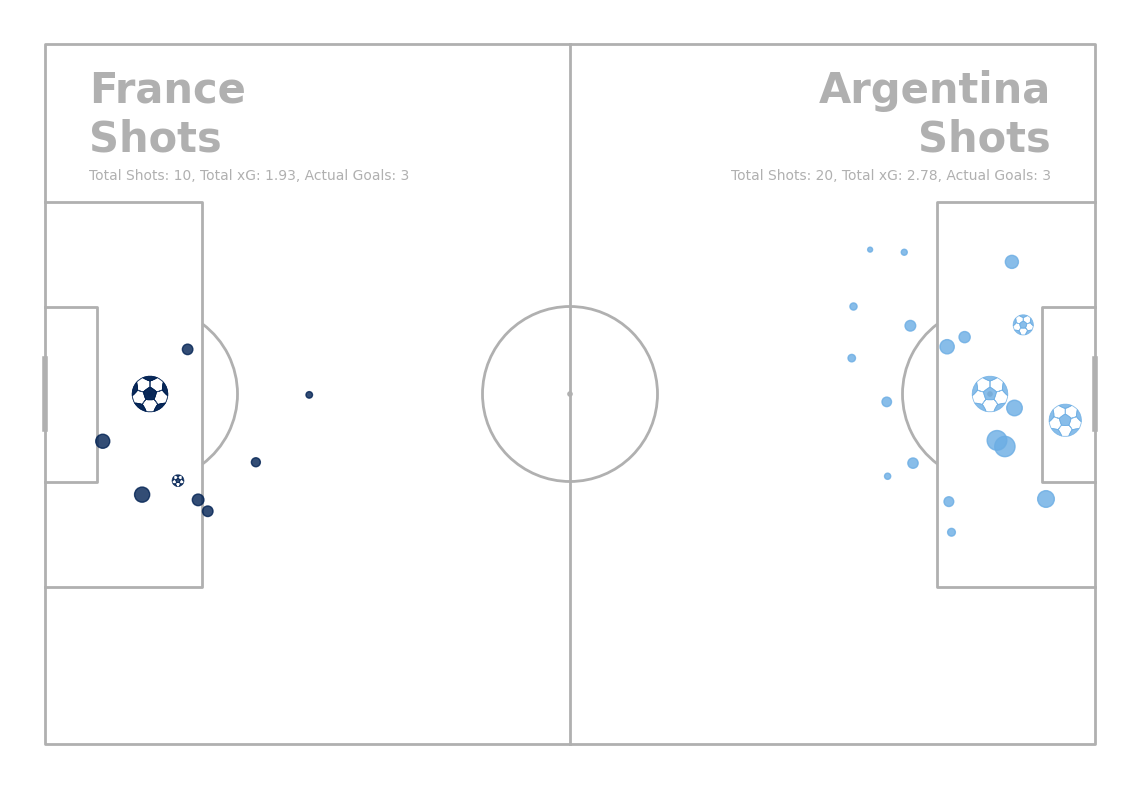

In [ ]:
# filter goals / non-shot goals
pitch = Pitch(pitch_type='statsbomb')
fig, ax = pitch.draw(figsize=(12, 8))

mask_france_goal = (df_france['outcome_name'] == 'Goal')
mask_france_no_goal = (df_france['outcome_name'] != 'Goal')
mask_argentina_goal = (df_argentina['outcome_name'] == 'Goal')
mask_argentina_no_goal = (df_argentina['outcome_name'] != 'Goal')

# plot france no goal
sc1 = pitch.scatter(120-df_france[mask_france_no_goal].x, 80-df_france[mask_france_no_goal].y,
                    s=(df_france[mask_france_no_goal].our_xg * 1000),
                    c='#002153',
                    marker='o',
                    ax=ax, alpha=0.8)

# plot france goals
sc2 = pitch.scatter(120-df_france[mask_france_goal].x, 80-df_france[mask_france_goal].y,
                    s=(df_france[mask_france_goal].our_xg * 1000),
                    edgecolors='#002153',
                    linewidth=0.6,
                    c='white',
                    marker='football',
                    ax=ax, alpha=0.8)

# plot argentina no goals
sc3 = pitch.scatter(df_argentina[mask_argentina_no_goal].x,df_argentina[mask_argentina_no_goal].y,
                    s=(df_argentina[mask_argentina_no_goal].our_xg * 1000),
                    c='#6bade4',
                    marker='o',
                    ax=ax, alpha=0.8)

# plot argentina goals
sc4 = pitch.scatter(df_argentina[mask_argentina_goal].x,df_argentina[mask_argentina_goal].y,
                    s=(df_argentina[mask_argentina_goal].our_xg * 1000),
                    edgecolors='#6bade4',
                    linewidth=0.6,
                    c='white',
                    marker='football',
                    ax=ax, alpha=0.8)

ax.text(x=5, y=8, s='France\nShots',
              size=30,
              color=pitch.line_color,
              va='center', ha='left', weight='bold')
ax.text(x=5, y=15, s='Total Shots: {}, Total xG: {}, Actual Goals: {}'.format(len(df_france),
                                                                                         round(df_france.our_xg.sum(), 2),
                                                                                         df_france[mask_france_goal].shape[0]),
              size=10,
              color=pitch.line_color,
              va='center', ha='left')
        
ax.text(x=115, y=8, s='Argentina\nShots',
              size=30,
              color=pitch.line_color,
              va='center', ha='right', weight='bold')
ax.text(x=115, y=15, s='Total Shots: {}, Total xG: {}, Actual Goals: {}'.format(len(df_argentina),
                                                                                         round(df_argentina.our_xg.sum(), 2),
                                                                                         df_argentina[mask_argentina_goal].shape[0]),
              size=10,
              color=pitch.line_color,
              va='center', ha='right')

# Expected Goals on Target (xGOT)

The probability of a shot will be a goal based on shot's end location

In [ ]:
# we'll take the location where the shots ended
a = pd.DataFrame(columns=['end_y', 'end_z', 'outcome_name'])

for id in df_match['match_id']:
  mask_shot = (df_matches[id]['event'].type_name == 'Shot') & (df_matches[id]['event'].period	<= 4)
  shots_temp = df_matches[id]['event'].loc[mask_shot, ['end_y', 'end_z', 'outcome_name']]
  a = pd.concat([a, shots_temp]).reset_index(drop=True)

In [ ]:
a.outcome_name.unique()

array(['Blocked', 'Saved', 'Off T', 'Post', 'Goal', 'Wayward',
       'Saved to Post', 'Saved Off Target'], dtype=object)

In [ ]:
a[a.outcome_name == 'Post']

,end_y,end_z,outcome_name
4,36.1,0.6,Post
79,36.1,0.7,Post
88,43.1,2.8,Post
160,36.0,0.4,Post
165,36.0,1.0,Post
175,36.1,2.7,Post
188,39.1,2.8,Post
318,44.0,1.3,Post
369,36.6,2.9,Post
471,36.1,0.7,Post


- well I'm confused here, I don't know what's the exact height value of crossbar, it's between 2.8 and 3.0, I will take 2.8

In [ ]:
mask_on_target = (a.end_y <= 44) & (a.end_y >= 36) & (a.end_z <= 2.8)

In [ ]:
a = a[mask_on_target].reset_index(drop=True)

## Visualization

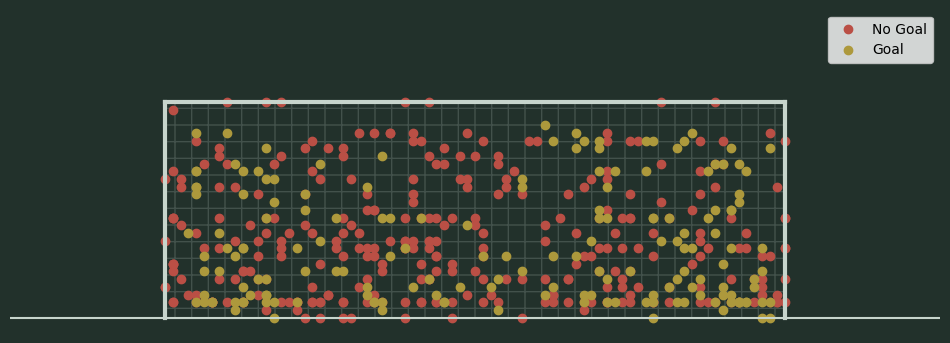

In [ ]:
from matplotlib.patches import Rectangle

#Create figure
fig=plt.figure(facecolor='#22312b')
fig.set_size_inches(12, 4.2)

#Goal post lines
plt.plot([34,46],[0,0], color='#c7d5cc', linewidth=1.5)
plt.plot([36,44],[2.8,2.8], color='#c7d5cc', linewidth=3)
plt.plot([44,44],[0,2.8], color='#c7d5cc', linewidth=3)
plt.plot([36,36],[0,2.8], color='#c7d5cc', linewidth=3)
#Goal net
plt.gca().add_patch(Rectangle((36, 0), 8, 2.8, fill=False, edgecolor='#c7d5cc', hatch='+', alpha=0.2))

#Tidy Axes
plt.axis('off')

goal_mask = a.outcome_name == 'Goal'
no_goal_mask = a.outcome_name != 'Goal'
sc1 = plt.scatter(a[no_goal_mask].end_y, a[no_goal_mask].end_z,
                    marker='o', color='#ba4f45', label='No Goal')
sc2 = plt.scatter(a[goal_mask].end_y, a[goal_mask].end_z,
                    marker='o', color='#ad993c', label='Goal')

plt.ylim(ymin=-0.2, ymax=4)
plt.xlim(xmin=34, xmax=46)
plt.legend()

plt.show()

## Preparing Data

In [ ]:
a['goal'] = a.apply(lambda row:1 if row['outcome_name']=='Goal' else 0, axis=1)

In [ ]:
a['end_y_center'] = a.apply(lambda row:abs(40-row['end_y']), axis=1)

In [ ]:
a['end_z_center'] = a.apply(lambda row:abs(1.4-row['end_z']), axis=1)

In [ ]:
fig = alt.Chart(a).mark_point().encode(x='end_y_center',y='goal')

fig + fig.transform_regression('end_y_center','goal').mark_line()

alt.LayerChart(...)

In [ ]:
fig = alt.Chart(a).mark_point().encode(x='end_z_center',y='goal')

fig + fig.transform_regression('end_z_center','goal').mark_line()

alt.LayerChart(...)

## Modelling

In [ ]:
X = a[['end_y_center', 'end_z_center']]
y = a['goal']
xgot_model = LogisticRegression()
xgot_model.fit(X, y)
y_pred = xgot_model.predict_proba(X)[:,-1]
metrics.r2_score(y, y_pred)

0.023626693073164673

## Evaluate on all matches

In [ ]:
# define function to calculate xG
def calculate_xgot(row):
  if (row.end_y <= 44) & (row.end_y >= 36) & (row.end_z <= 2.8): # if on target
    end_y_center = abs(40-row['end_y'])
    end_z_center = abs(1.4-row['end_z'])
    X = [[end_y_center, end_z_center]]
    xgot = xgot_model.predict_proba(X)[:, 1][0]
    return xgot
  else:
    return 0

In [ ]:
df_summary = df_match[['match_id', 'home_team_name', 'away_team_name']].copy()

home_goal = []
home_xg = []
home_xg_sb = []
home_xgot = []

away_goal = []
away_xg = []
away_xg_sb = []
away_xgot = []

for i, id in enumerate(df_match.match_id):
  df_evaluate = df_matches[id]['event'][df_matches[id]['event']['type_name'] == 'Shot']

  # take only open play
  evaluate_mask = (df_evaluate.type_name == 'Shot') & (df_evaluate.period	<= 4)
  df_evaluate = df_evaluate[evaluate_mask]

  # calculate xg per shot
  df_evaluate['our_xg'] = df_evaluate.apply(lambda row:calculate_xg_adv(row), axis=1)
  df_evaluate['our_xgot'] = df_evaluate.apply(lambda row:calculate_xgot(row), axis=1)

  # home team
  df_home = df_evaluate[df_evaluate.team_name == df_match['home_team_name'][i]]
  home_goal.append(len(df_home[df_home.outcome_name == 'Goal']))
  home_xg.append(df_home.our_xg.sum())
  home_xg_sb.append(df_home.shot_statsbomb_xg.sum())
  home_xgot.append(df_home.our_xgot.sum())

  # away team
  df_away = df_evaluate[df_evaluate.team_name == df_match['away_team_name'][i]]
  away_goal.append(len(df_away[df_away.outcome_name == 'Goal']))
  away_xg.append(df_away.our_xg.sum())
  away_xg_sb.append(df_away.shot_statsbomb_xg.sum())
  away_xgot.append(df_away.our_xgot.sum())

df_summary['home_goal'] = home_goal
df_summary['home_xg'] = home_xg
df_summary['home_xg_sb'] = home_xg_sb
df_summary['home_xgot'] = home_xgot

df_summary['away_goal'] = away_goal
df_summary['away_xg'] = away_xg
df_summary['away_xg_sb'] = away_xg_sb
df_summary['away_xgot'] = away_xgot

In [ ]:
df_summary.head(10)

,match_id,home_team_name,away_team_name,home_goal,home_xg,home_xg_sb,home_xgot,away_goal,away_xg,away_xg_sb,away_xgot
0,3857256,Serbia,Switzerland,2,1.493781,1.189004,1.922890,3,2.483093,3.103515,2.013846
1,3869151,Argentina,Australia,2,1.324700,1.481579,1.569854,0,0.586725,0.426118,0.000000
2,3857257,Australia,Denmark,1,0.404915,0.469723,1.584213,0,1.326828,0.737155,0.297602
3,3857258,Brazil,Serbia,2,1.960283,2.123890,3.308391,0,0.209117,0.163327,0.000000
4,3857288,Tunisia,Australia,0,1.316651,1.052170,1.387297,1,0.490532,0.359038,0.712290
5,3857267,Ecuador,Senegal,1,1.102636,1.001663,1.350769,2,1.751185,1.707465,1.233852
6,3869321,Netherlands,Argentina,2,0.693612,0.569538,0.762193,2,1.622771,1.939197,2.266626
7,3857287,Uruguay,South Korea,0,0.634220,0.417294,1.401714,0,0.609650,0.492993,0.000000
8,3869486,Morocco,Portugal,1,0.848070,0.972023,0.709264,0,0.847005,0.744121,0.963063
9,3869685,Argentina,France,3,2.775122,2.758306,2.584436,3,1.928040,2.272618,1.602283


## How to Interpret xG with xGOT
- If you have high xG but low xGOT, it means you're in good position to shoot but your shot placing skill is not good
- On the contrary, if you have low xG but high xGOT, it means you're not in good position to shoot but your shot placing skill is good

# Who's the Best Finisher in World Cup 2022?

In [ ]:
new_features = ['player_name', 'x', 'y', 'outcome_name', 'sub_type_name', 'body_part_name', 'under_pressure', 'technique_name', 'shot_statsbomb_xg', 'end_y', 'end_z']
df_shot_player = pd.DataFrame(columns=new_features)

for id in df_match['match_id']:
  mask_shot = (df_matches[id]['event'].type_name == 'Shot') & (df_matches[id]['event'].period	<= 4)
  shots_temp = df_matches[id]['event'].loc[mask_shot, new_features]
  df_shot_player = pd.concat([df_shot_player, shots_temp]).reset_index(drop=True)

In [ ]:
df_shot_player.head()

,player_name,x,y,outcome_name,sub_type_name,body_part_name,under_pressure,technique_name,shot_statsbomb_xg,end_y,end_z
0,Granit Xhaka,96.0,38.8,Blocked,Open Play,Left Foot,NaN,Half Volley,0.036566,38.5,NaN
1,Breel-Donald Embolo,113.1,40.7,Saved,Open Play,Left Foot,NaN,Half Volley,0.353289,40.6,1.6
2,Granit Xhaka,103.8,41.9,Saved,Open Play,Right Foot,NaN,Half Volley,0.069527,39.1,1.0
3,Nikola Milenković,112.2,36.8,Off T,Open Play,Head,NaN,Normal,0.081609,35.3,3.5
4,Andrija Živković,97.8,51.5,Post,Open Play,Left Foot,NaN,Normal,0.030002,36.1,0.6


In [ ]:
df_shot_player['our_xg'] = df_shot_player.apply(lambda row:calculate_xg_adv(row), axis=1)
df_shot_player['our_xgot'] = df_shot_player.apply(lambda row:calculate_xgot(row), axis=1)

In [ ]:
df_shot_player['goal'] = df_shot_player.apply(lambda row:1 if row['outcome_name'] == 'Goal' else 0, axis=1)

In [ ]:
player_summary = df_shot_player.groupby('player_name')[['our_xg', 'our_xgot', 'shot_statsbomb_xg', 'goal']].sum().reset_index()

In [ ]:
alt.Chart(player_summary).mark_circle(size=60).encode(
    x='our_xgot:Q',
    y='our_xg:Q',
    color=alt.Color('goal', scale=alt.Scale(range=["#ff8000", "#00b020"])),
    tooltip=['player_name', 'our_xg', 'our_xgot', 'shot_statsbomb_xg', 'goal']
).interactive()

alt.Chart(...)

In [ ]:
alt.Chart(player_summary).mark_circle(size=60).encode(
    x='our_xgot:Q',
    y='shot_statsbomb_xg:Q',
    color=alt.Color('goal', scale=alt.Scale(range=["#ff8000", "#00b020"])),
    tooltip=['player_name', 'our_xg', 'our_xgot', 'shot_statsbomb_xg', 'goal']
).interactive()

alt.Chart(...)

- Well it's that man again, Lionel Messi has the highest xG and xGOT!
- Lewandowski has higher xG than xGOT means his shots were badly placed

## Biggest Overachiever
I'm gonna take an average of the xG and xGOT, then substract actual goals to it

In [ ]:
player_summary['difference'] = player_summary['goal']-(player_summary['our_xg'] + player_summary['our_xgot'])/2

In [ ]:
player_summary.sort_values('difference', ascending=False).head(10)

,player_name,our_xg,our_xgot,shot_statsbomb_xg,goal,difference
234,Kylian Mbappé Lottin,5.009529,3.898103,4.233252,8,3.546184
76,Cody Mathès Gakpo,0.401769,1.334861,0.562367,3,2.131685
210,Julián Álvarez,1.856296,2.095328,1.908327,4,2.024188
67,Bukayo Saka,0.934094,1.597887,0.579455,3,1.734009
339,Richarlison de Andrade,1.378970,1.154832,1.617659,3,1.733099
312,Olivier Giroud,2.503791,2.379384,3.035955,4,1.558412
257,Marcus Rashford,1.276142,1.626572,1.382586,3,1.548643
424,Álvaro Borja Morata Martín,1.234227,1.786951,1.109481,3,1.489411
330,Rafael Alexandre Conceição Leão,0.282047,0.836493,0.248384,2,1.440730
410,Wout Weghorst,0.363261,0.762193,0.267010,2,1.437273


## Biggest Underachiever

In [ ]:
player_summary.sort_values('difference').head(10)

,player_name,our_xg,our_xgot,shot_statsbomb_xg,goal,difference
173,Jamal Musiala,1.439239,1.924107,1.152516,0,-1.681673
236,Lautaro Javier Martínez,1.787563,0.754142,2.121547,0,-1.270852
351,Romelu Lukaku Menama,1.770308,0.716523,1.684155,0,-1.243415
334,Raphael Dias Belloli,0.678755,1.254283,0.922931,0,-0.966519
195,Joshua Kimmich,0.392039,1.377405,0.334518,0,-0.884722
63,Bruno Guimarães Rodriguez Moura,0.993222,0.729860,0.647812,0,-0.861541
248,Luka Modrić,0.345312,1.336120,0.343857,0,-0.840716
226,Kieffer Roberto Francisco Moore,1.055430,0.588052,0.640329,0,-0.821741
146,Harry Maguire,0.406264,1.205776,0.489956,0,-0.806020
418,Youssef Msakni,0.856549,0.725605,0.642520,0,-0.791077


## Mbappe Shots

In [ ]:
mask_mbappe = df_shot_player['player_name'] == "Kylian Mbappé Lottin"
df_mbappe = df_shot_player.loc[mask_mbappe]

In [ ]:
df_mbappe.head()

,player_name,x,y,outcome_name,sub_type_name,body_part_name,under_pressure,technique_name,shot_statsbomb_xg,end_y,end_z,our_xg,our_xgot,goal
209,Kylian Mbappé Lottin,102.5,27.9,Off T,Open Play,Right Foot,NaN,Normal,0.050644,38.8,4.5,0.070150,0.000000,0
211,Kylian Mbappé Lottin,108.0,40.0,Goal,Penalty,Right Foot,NaN,Normal,0.783500,37.3,0.3,0.691301,0.405474,1
212,Kylian Mbappé Lottin,104.8,30.1,Goal,Open Play,Right Foot,NaN,Volley,0.101703,41.5,0.3,0.075433,0.326598,1
214,Kylian Mbappé Lottin,95.9,32.2,Blocked,Open Play,Right Foot,NaN,Normal,0.032449,33.5,NaN,0.041898,0.000000,0
225,Kylian Mbappé Lottin,101.4,26.6,Blocked,Open Play,Right Foot,NaN,Normal,0.030757,29.1,NaN,0.057775,0.000000,0


In [ ]:
df_mbappe[df_mbappe['our_xgot']>0]

,player_name,x,y,outcome_name,sub_type_name,body_part_name,under_pressure,technique_name,shot_statsbomb_xg,end_y,end_z,our_xg,our_xgot,goal
211,Kylian Mbappé Lottin,108.0,40.0,Goal,Penalty,Right Foot,NaN,Normal,0.783500,37.3,0.3,0.691301,0.405474,1
212,Kylian Mbappé Lottin,104.8,30.1,Goal,Open Play,Right Foot,NaN,Volley,0.101703,41.5,0.3,0.075433,0.326598,1
226,Kylian Mbappé Lottin,108.0,40.0,Goal,Penalty,Right Foot,NaN,Normal,0.783500,36.7,1.1,0.691301,0.411535,1
308,Kylian Mbappé Lottin,104.1,30.1,Saved,Open Play,Left Foot,NaN,Normal,0.036308,36.7,2.1,0.086602,0.429243,0
310,Kylian Mbappé Lottin,110.8,31.3,Goal,Open Play,Right Foot,NaN,Half Volley,0.085056,40.1,0.8,0.116334,0.229314,1
320,Kylian Mbappé Lottin,117.8,36.5,Goal,Open Play,Other,NaN,Normal,0.383531,37.3,1.3,0.776541,0.362526,1
322,Kylian Mbappé Lottin,99.4,25.5,Saved,Open Play,Right Foot,NaN,Half Volley,0.033781,37.1,0.6,0.023555,0.406030,0
631,Kylian Mbappé Lottin,104.8,28.6,Goal,Open Play,Right Foot,NaN,Normal,0.087381,37.3,2.2,0.092096,0.392403,1
633,Kylian Mbappé Lottin,106.2,25.2,Goal,Open Play,Right Foot,NaN,Normal,0.042709,42.6,2.2,0.077937,0.385651,1
1166,Kylian Mbappé Lottin,113.5,42.2,Goal,Open Play,Head,1.0,Normal,0.141429,37.8,1.4,0.163474,0.326374,1


## Mbappe Viz

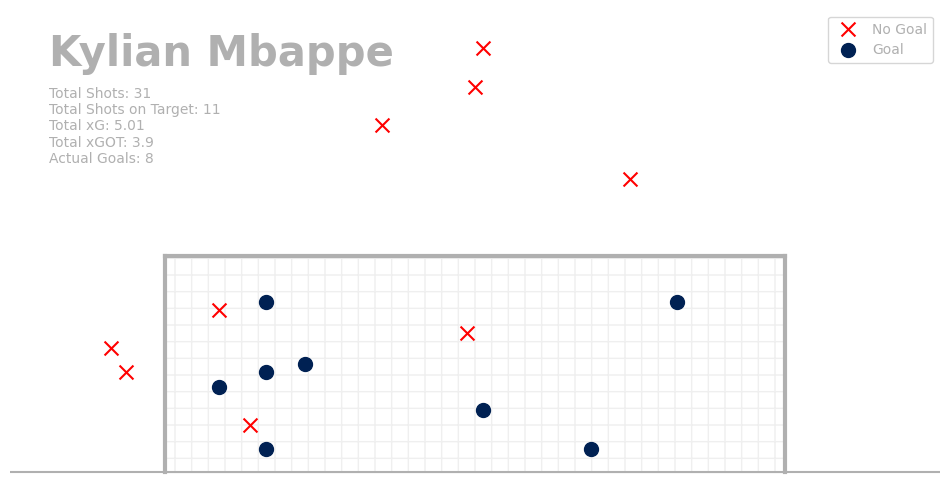

In [ ]:
from matplotlib.patches import Rectangle

#Create figure
fig=plt.figure()
fig.set_size_inches(12, 6.2)

#Goal post lines
plt.plot([34,46],[0,0], color=pitch.line_color, linewidth=1.5)
plt.plot([36,44],[2.8,2.8], color=pitch.line_color, linewidth=3)
plt.plot([44,44],[0,2.8], color=pitch.line_color, linewidth=3)
plt.plot([36,36],[0,2.8], color=pitch.line_color, linewidth=3)
#Goal net
plt.gca().add_patch(Rectangle((36, 0), 8, 2.8, fill=False, edgecolor=pitch.line_color, hatch='+', alpha=0.2))

#Tidy Axes
plt.axis('off')

goal_mask = df_mbappe.outcome_name == 'Goal'
no_goal_mask = df_mbappe.outcome_name != 'Goal'
on_target_mask = (df_mbappe.end_y <= 44) & (df_mbappe.end_y >= 36) & (df_mbappe.end_z <= 2.8)
sc1 = plt.scatter(df_mbappe[no_goal_mask].end_y, df_mbappe[no_goal_mask].end_z, s=100,
                    marker='x', color='red', label='No Goal')
sc2 = plt.scatter(df_mbappe[goal_mask].end_y, df_mbappe[goal_mask].end_z, s=100,
                    marker='o', color='#002153', label='Goal')


plt.text(x=34.5, y=5.7, s="Kylian Mbappe", color=pitch.line_color, fontsize=30, weight="bold", ha='left', va='top')
plt.text(x=34.5, y=5, s='Total Shots: {}\nTotal Shots on Target: {}\nTotal xG: {}\nTotal xGOT: {}\nActual Goals: {}'.format(len(df_mbappe),
                                                                                                                len(df_mbappe[on_target_mask]),
                                                                                         round(df_mbappe.our_xg.sum(), 2),
                                                                                         round(df_mbappe.our_xgot.sum(), 2),
                                                                                         df_mbappe[goal_mask].shape[0]),
              size=10,
              color=pitch.line_color,
              va='top', ha='left')

plt.ylim(ymin=-0.2, ymax=6)
plt.xlim(xmin=34, xmax=46)
plt.legend(labelcolor=pitch.line_color)

plt.show()

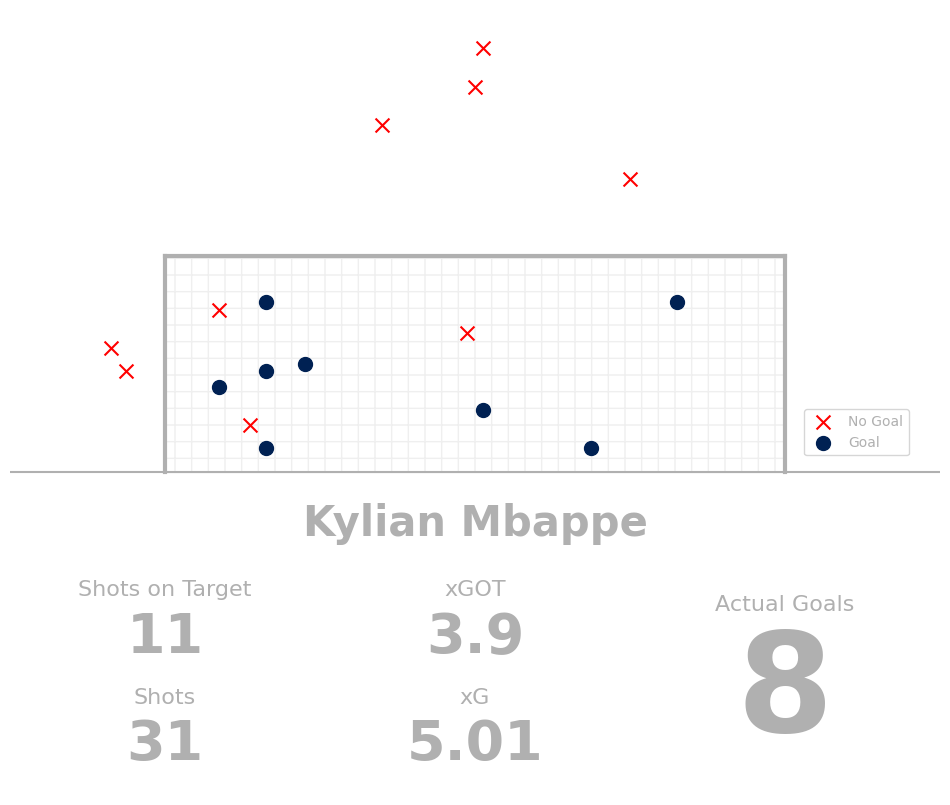

In [ ]:
from matplotlib.patches import Rectangle

#Create figure
fig=plt.figure()
fig.set_size_inches(12, 10.2)

#Goal post lines
plt.plot([34,46],[0,0], color=pitch.line_color, linewidth=1.5)
plt.plot([36,44],[2.8,2.8], color=pitch.line_color, linewidth=3)
plt.plot([44,44],[0,2.8], color=pitch.line_color, linewidth=3)
plt.plot([36,36],[0,2.8], color=pitch.line_color, linewidth=3)
#Goal net
plt.gca().add_patch(Rectangle((36, 0), 8, 2.8, fill=False, edgecolor=pitch.line_color, hatch='+', alpha=0.2))

#Tidy Axes
plt.axis('off')

goal_mask = df_mbappe.outcome_name == 'Goal'
no_goal_mask = df_mbappe.outcome_name != 'Goal'
on_target_mask = (df_mbappe.end_y <= 44) & (df_mbappe.end_y >= 36) & (df_mbappe.end_z <= 2.8)
sc1 = plt.scatter(df_mbappe[no_goal_mask].end_y, df_mbappe[no_goal_mask].end_z, s=100,
                    marker='x', color='red', label='No Goal')
sc2 = plt.scatter(df_mbappe[goal_mask].end_y, df_mbappe[goal_mask].end_z, s=100,
                    marker='o', color='#002153', label='Goal')


plt.text(x=40, y=-0.4, s="Kylian Mbappe", color=pitch.line_color, fontsize=30, weight="bold", ha='center', va='top')

plt.text(x=36, y=-1.4, s="Shots on Target", color=pitch.line_color, fontsize=16, ha='center', va='top')
plt.text(x=36, y=-1.8, s="{}".format(len(df_mbappe[on_target_mask])), color=pitch.line_color, fontsize=40, weight="bold", ha='center', va='top')
plt.text(x=40, y=-1.4, s="xGOT", color=pitch.line_color, fontsize=16, ha='center', va='top')
plt.text(x=40, y=-1.8, s="{}".format(round(df_mbappe.our_xgot.sum(), 2)), color=pitch.line_color, fontsize=40, weight="bold", ha='center', va='top')
plt.text(x=44, y=-1.6, s="Actual Goals", color=pitch.line_color, fontsize=16, ha='center', va='top')
plt.text(x=44, y=-2.0, s="{}".format(df_mbappe[goal_mask].shape[0]), color=pitch.line_color, fontsize=100, weight="bold", ha='center', va='top')

plt.text(x=36, y=-2.8, s="Shots", color=pitch.line_color, fontsize=16, ha='center', va='top')
plt.text(x=36, y=-3.2, s="{}".format(len(df_mbappe)), color=pitch.line_color, fontsize=40, weight="bold", ha='center', va='top')
plt.text(x=40, y=-2.8, s="xG", color=pitch.line_color, fontsize=16, ha='center', va='top')
plt.text(x=40, y=-3.2, s="{}".format(round(df_mbappe.our_xg.sum(), 2)), color=pitch.line_color, fontsize=40, weight="bold", ha='center', va='top')


plt.ylim(ymin=-4.2, ymax=6)
plt.xlim(xmin=34, xmax=46)
plt.legend(labelcolor=pitch.line_color, bbox_to_anchor=(0.91, 0.5), loc="upper center")

plt.show()